# Credit EDA Assignment

#### The objective of this assignment is to develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

# Business Understanding

#### The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer:  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

# Business Objectives

  This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', 300) # to display all the columns
pd.set_option('display.max_rows', 300) # to display all the rows
pd.set_option('display.width', 1000)

### Handling Warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import os
os.getcwd()

'/Users/vamanyadav/Downloads'

#### Read in the datasets

In [5]:
inp0=pd.read_csv("application_data.csv")
inp1=pd.read_csv("previous_application.csv")

In [5]:
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Basic metadata checks

In [9]:
inp0.shape

(307511, 122)

In [10]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [11]:
inp1.shape

(1670214, 37)

In [14]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

# Working with Application dataset

## Data Cleaning

### Fixing rows and columns

#### Checklist for fixing rows:

 Delete summary rows: Total and Subtotal rows     

 Delete incorrect rows: Header row and footer row

 Delete extra rows: Column number, indicators, Blank rows, Page No.

#### Checklist for fixing columns:
 Merge columns for creating unique identifiers, if needed, for example, merge the columns State and City into the column Full address.
 
 Split columns to get more data: Split the Address column to get State and City columns to analyse each separately.
 
 Add column names: Add column names if missing.
 
 Rename columns consistently: Abbreviations, encoded columns.

 Delete columns: Delete unnecessary columns.
 
 Align misaligned columns: The data set may have shifted columns, which you need to align correctly.

In [15]:
inp0.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


### Dropping unnecessary columns

In [16]:
inp0.drop(columns=["FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6",
"FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12",
"FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18",
"FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"],axis=1,inplace=True)

In [44]:
inp0.shape

(307511, 103)

# Impute/Remove missing values

Set values as missing values: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.

Adding is good, exaggerating is bad: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.

Delete rows and columns: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.

Fill partial missing values using business judgement: Such values include missing time zone, century, etc. 

These values can be identified easily.

Types of missing values:

MCAR: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).

MAR: It stands for Missing at random (the reason behind the missing value may be associated with some other features).

MNAR: It stands for Missing not at random (there is a specific reason behind the missing value).



### Identifying the Nulls 

In [17]:
mv=inp0.isnull().mean()*100

In [18]:
mv=mv.reset_index()
mv=mv.rename(columns={"index":"Column Name",0: "% of Nulls"})
mv=mv.sort_values(by="% of Nulls",ascending=False)

In [19]:
mv

,Column Name,% of Nulls
45,COMMONAREA_AVG,69.872297
59,COMMONAREA_MODE,69.872297
73,COMMONAREA_MEDI,69.872297
53,NONLIVINGAPARTMENTS_AVG,69.432963
81,NONLIVINGAPARTMENTS_MEDI,69.432963
67,NONLIVINGAPARTMENTS_MODE,69.432963
83,FONDKAPREMONT_MODE,68.386172
51,LIVINGAPARTMENTS_AVG,68.354953
65,LIVINGAPARTMENTS_MODE,68.354953
79,LIVINGAPARTMENTS_MEDI,68.354953


### Setting Threshold Value as 45 and dropping all columns with null values % greater than 45%

In [20]:
drop_cols=list(mv[mv["% of Nulls"]>45]["Column Name"])

In [21]:
len(drop_cols)

48

#### Creating a new dataset for the existing dataset to remain as backup

In [22]:
inp01=inp0.drop(drop_cols,axis=1)

In [23]:
inp01.shape

(307511, 51)

#### Identifying continous columns to handle null values 

In [24]:
cont_cols=list(inp01.select_dtypes(include=['float64','int64']).columns)

#### Automatically imuputing all the null values continous columns with median.

Mean can be used when there are no outliers, without outliers mean and median values are very close.

Median can be used when there are outliers.

In either of the cases median is the safe way to impute null values.

In [25]:

for i in cont_cols:
    if inp01[i].isnull().mean()>0:
        impute_val=inp01[i].median()
        inp01[i].fillna(impute_val,inplace=True)

#### Checking for nulls after handling

In [26]:
inp01.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

### Categorical Varaibles NAME_TYPE_SUITE and OCCUPATION_TYPE have null values

In [27]:
inp01.NAME_TYPE_SUITE.isnull().sum()

1292

#### Replacing the null values with most common value

In [28]:
inp01.NAME_TYPE_SUITE.fillna(inp01.NAME_TYPE_SUITE.mode()[0],inplace=True)

In [68]:
inp01.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_TYPE_SUITE                 0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

#### Creating a new category 'Missing' for OCCUPATION_TYPE as % of nulls is around 31% and we dont want to miss the data by deleting rows

In [29]:
inp01.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [30]:
inp01.OCCUPATION_TYPE.fillna("Missing",inplace=True)

In [31]:
inp01.OCCUPATION_TYPE.value_counts()

Missing                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [72]:
inp01.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [32]:
inp01.CNT_FAM_MEMBERS.value_counts()

2.0     158359
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

#### Converting CNT_FAM_MEMBERS to integer

In [33]:
inp01.CNT_FAM_MEMBERS=inp01.CNT_FAM_MEMBERS.astype('int64')

In [75]:
inp01.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

### Verifying key features for any unknown values

In [34]:
inp01.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [35]:
inp01.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [36]:
inp01.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [37]:
inp01.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [38]:
inp01.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [39]:
inp01.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [85]:
inp01.OCCUPATION_TYPE.value_counts()

Missing                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [40]:
inp01.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

#### Replacing F and M with "Female" and "Male" for Standardizing purpose 

In [41]:
inp01.CODE_GENDER.replace(['F','M'],["Female","Male"],inplace=True)

In [42]:
inp01.CODE_GENDER.value_counts()

Female    202448
Male      105059
XNA            4
Name: CODE_GENDER, dtype: int64

In [98]:
inp01.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

#### XNA to be converted to NaN and then imputed with mode value for CODE_GENDER and Missing for ORGANIZATION_TYPE

In [43]:
inp01.loc[inp01.CODE_GENDER=='XNA',"CODE_GENDER"]=np.NaN

In [44]:
inp01.CODE_GENDER.fillna(inp01.CODE_GENDER.mode()[0],inplace=True)

In [45]:
inp01.CODE_GENDER.value_counts()

Female    202452
Male      105059
Name: CODE_GENDER, dtype: int64

In [46]:
inp01.loc[inp01.ORGANIZATION_TYPE=='XNA',"ORGANIZATION_TYPE"]=np.NaN

In [47]:
inp01.ORGANIZATION_TYPE.fillna('Missing',inplace=True)

In [102]:
inp01.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Missing                   55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

#### Checking values in the Target variable

In [48]:
inp01.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

# Handling Outliers

##### Major approaches to the treat outliers:

Imputation

Deletion of outliers

Binning of values

Cap the outlier

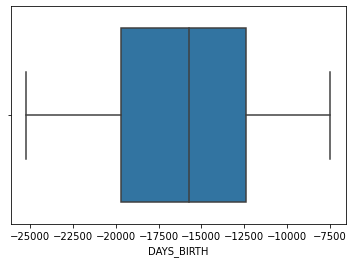

In [49]:
sns.boxplot(inp01.DAYS_BIRTH)
plt.show()

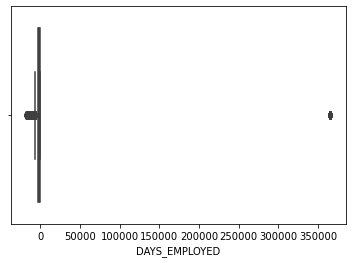

In [50]:
sns.boxplot(inp01.DAYS_EMPLOYED)
plt.show()

In [51]:
inp01.DAYS_ID_PUBLISH.describe()


count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

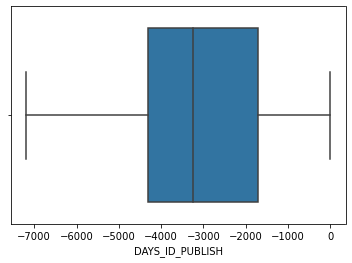

In [52]:
sns.boxplot(inp01.DAYS_ID_PUBLISH)
plt.show()

In [53]:
inp01.DAYS_LAST_PHONE_CHANGE.describe()

count    307511.000000
mean       -962.858119
std         826.807226
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

#### Its observed that columns starting with DAYS have -ve values same has to be converted to absolute

In [54]:
days_cols=[]
for i in inp01.columns:
    if "DAYS" in i:
        days_cols.append(i)

In [55]:
days_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [56]:
for i in days_cols:
    inp01[i]=inp01[i].apply(lambda x:abs(x))

In [57]:
inp01.DAYS_BIRTH.describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [58]:
pd.options.display.float_format='{:,.2f}'.format

In [59]:
inp01.DAYS_EMPLOYED.describe()

count   307,511.00
mean     67,724.74
std     139,443.75
min           0.00
25%         933.00
50%       2,219.00
75%       5,707.00
max     365,243.00
Name: DAYS_EMPLOYED, dtype: float64

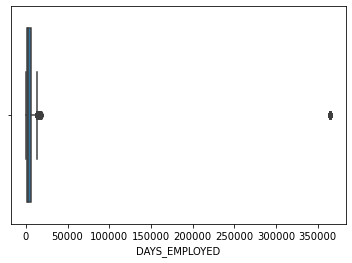

In [60]:
sns.boxplot(inp01.DAYS_EMPLOYED)
plt.show()

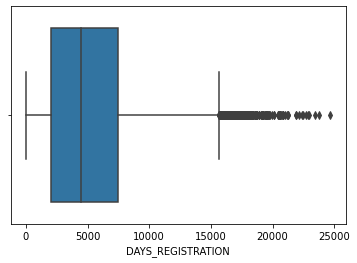

In [128]:
sns.boxplot(inp01.DAYS_REGISTRATION)
plt.show()

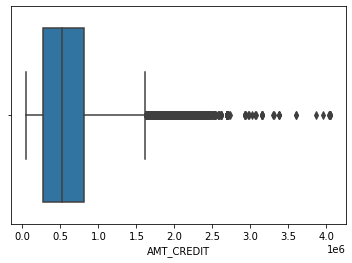

In [61]:
sns.boxplot(inp01.AMT_CREDIT)
plt.show()

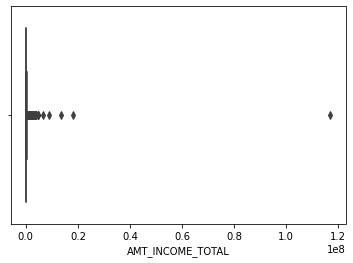

In [62]:
sns.boxplot(inp01.AMT_INCOME_TOTAL)
plt.show()

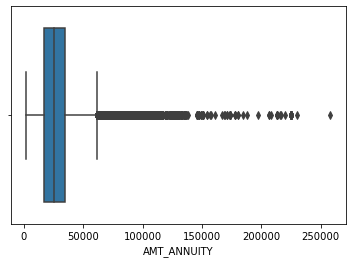

In [63]:
sns.boxplot(inp01.AMT_ANNUITY)
plt.show()

#### For columns with data type as float build and automated approach for capping and flooring the outliers

In [64]:
outlier_cols=list(inp01.select_dtypes(include=['float64']).columns)

In [65]:
for i in outlier_cols:
    q1=inp01[i].describe()["25%"]
    q3=inp01[i].describe()["75%"]
    iqr=q3-q1
    upperbound=q3+(1.5*iqr)
    lowerbound=q1-(1.5*iqr)
    inp01[i]=np.where(inp01[i]>upperbound,upperbound,inp01[i])## Capping with upperbound
    inp01[i]=np.where(inp01[i]<lowerbound,lowerbound,inp01[i])## Flooring with Lower bound

#### DAYS_EMPLOYED and DAYS_REGISTRATION Cols with int datatypes have outliers treating them in the same way as above

In [66]:
outlier_cols_int=["DAYS_EMPLOYED","DAYS_REGISTRATION"]

In [67]:
for i in outlier_cols_int:
    q1=inp01[i].describe()["25%"]
    q3=inp01[i].describe()["75%"]
    iqr=q3-q1
    upperbound=q3+(1.5*iqr)
    lowerbound=q1-(1.5*iqr)
    inp01[i]=np.where(inp01[i]>upperbound,upperbound,inp01[i])## Capping with upperbound
    inp01[i]=np.where(inp01[i]<lowerbound,lowerbound,inp01[i])## Flooring with Lower bound

#### Calculating Age from DAYS_BIRTH and YEARS_EXP from DAYS_EMPLOYED

In [68]:
inp01["AGE"]=inp01.DAYS_BIRTH//365.25
inp01["YEARS_EXP"]=inp01.DAYS_EMPLOYED//365.25

In [133]:
inp01.AGE.describe()

count   307,511.00
mean         43.41
std          11.95
min          20.00
25%          33.00
50%          43.00
75%          53.00
max          69.00
Name: AGE, dtype: float64

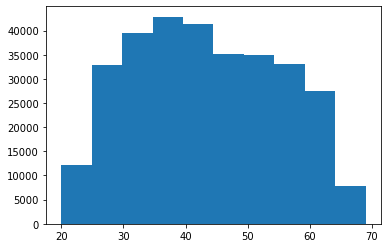

In [69]:
plt.hist(inp01.AGE,bins=10)
plt.show()

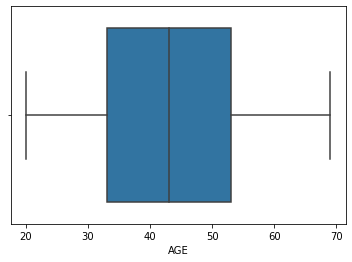

In [70]:
sns.boxplot(inp01.AGE)
plt.show()

In [140]:
inp01.AGE.dtype

dtype('float64')

In [71]:
inp01["AGE"]=inp01["AGE"].astype("int64")


In [72]:
inp01["YEARS_EXP"]=inp01["YEARS_EXP"].astype("int64")

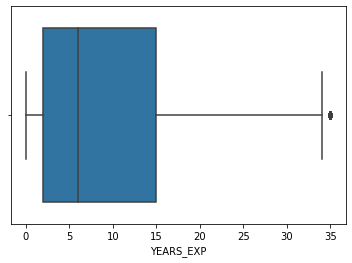

In [142]:
sns.boxplot(inp01.YEARS_EXP)
plt.show()

#### Binning AGE,YEARS_EXP, AMT_INCOME_TOTAL for analysis

In [73]:
#Creating a new varaiable INCOME_GROUP
inp01['INCOME_GROUP']=pd.qcut(inp01['AMT_INCOME_TOTAL'],
                                       q=[0,0.1,0.3,0.6,0.8,1],
                                       labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [74]:
# Creating AGE_GROUP with 5 years bins
inp01["AGE_GROUP"]=pd.cut(inp01.AGE,np.arange(20,71,5))

In [75]:
inp01.YEARS_EXP.describe()

count   307,511.00
mean         11.24
std          12.53
min           0.00
25%           2.00
50%           6.00
75%          15.00
max          35.00
Name: YEARS_EXP, dtype: float64

In [76]:
# Creating YEARS_EXP_GROUP with 5 years bins
inp01["YEARS_EXP_GROUP"]=pd.cut(inp01.YEARS_EXP,bins=np.arange(0,40,5))

## Checking Imbalance of Target Variable

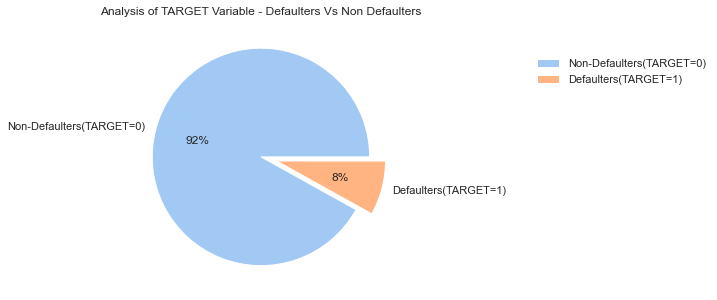

In [538]:
plt.figure(figsize=(10,5))
palette_color = sns.color_palette('pastel')

plt.pie(inp01.TARGET.value_counts(normalize=True)*100, labels=["Non-Defaulters(TARGET=0)","Defaulters(TARGET=1)"],explode=(0,0.15),autopct='%.0f%%',colors=palette_color)

plt.title("Analysis of TARGET Variable - Defaulters Vs Non Defaulters")

plt.legend(loc=(1.5,0.75))

plt.show()


#### There is a clear Imbalance in the data where people defaulting th loans is only 8% where as people not defaulting are about 92%.

In [82]:
inp01.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EXP,INCOME_GROUP,AGE_GROUP,YEARS_EXP_GROUP
0,100002,1,Cash loans,Male,N,Y,0,"202,500.00","406,597.50","24,700.50","351,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,9461,637.00,"3,648.00",2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.00,0.00,2.00,0.00,"1,134.00",0.00,0.00,0.00,0.00,0.00,1.00,25,1,High,"(20, 25]","(0.0, 5.0]"
1,100003,0,Cash loans,Female,N,N,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",Family,State servant,Higher education,Married,House / apartment,0.00,16765,"1,188.00","1,186.00",291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1.00,0.00,1.00,0.00,828.00,0.00,0.00,0.00,0.00,0.00,0.00,45,3,VeryHigh,"(40, 45]","(0.0, 5.0]"
2,100004,0,Revolving loans,Male,Y,Y,0,"67,500.00","135,000.00","6,750.00","135,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,19046,225.00,"4,260.00",2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.00,0.00,0.00,0.00,815.00,0.00,0.00,0.00,0.00,0.00,0.00,52,0,VeryLow,"(50, 55]",NaN
3,100006,0,Cash loans,Female,N,Y,0,"135,000.00","312,682.50","29,686.50","297,000.00",Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,19005,"3,039.00","9,833.00",2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.00,0.00,2.00,0.00,617.00,0.00,0.00,0.00,0.00,0.00,1.00,52,8,Medium,"(50, 55]","(5.0, 10.0]"
4,100007,0,Cash loans,Male,N,Y,0,"121,500.00","513,000.00","21,865.50","513,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,19932,"3,038.00","4,311.00",3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.00,0.00,0.00,0.00,"1,106.00",0.00,0.00,0.00,0.00,0.00,0.00,54,8,Medium,"(50, 55]","(5.0, 10.0]"


# Univariate Analysis

### Categorical unordered univariate analysis

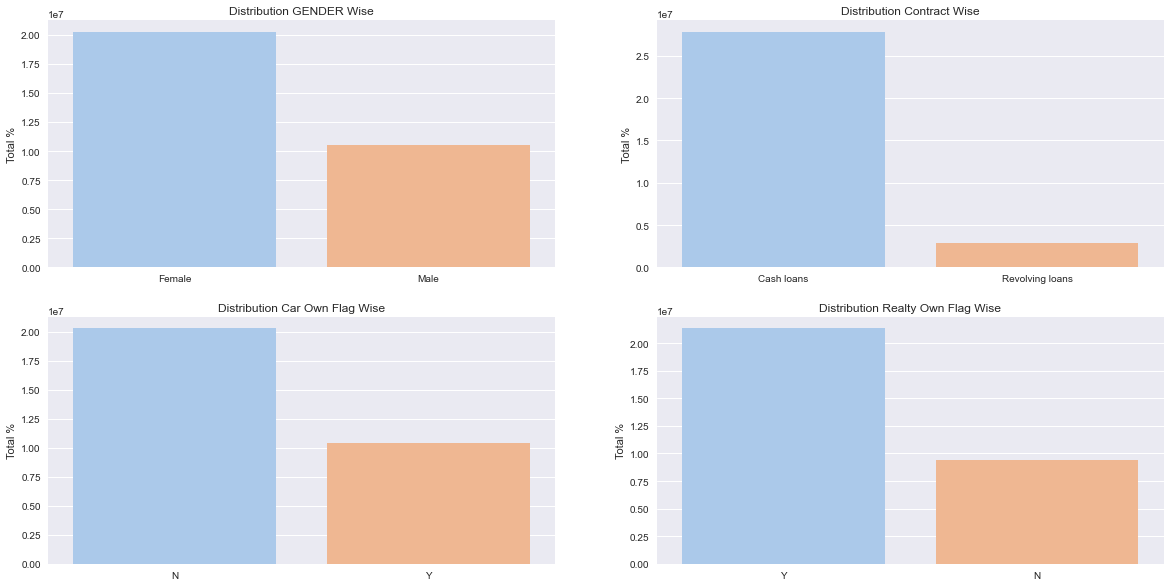

In [83]:
plt.style.use("seaborn")


fig, ax=plt.subplots(2,2,figsize=(20,10))

sns.barplot(x=inp01["CODE_GENDER"].value_counts().index,y=inp01["CODE_GENDER"].value_counts()*100,palette="pastel",ax=ax[0][0])
ax[0][0].set_title("Distribution GENDER Wise")
ax[0][0].set_ylabel("Total %")

sns.barplot(x=inp01["NAME_CONTRACT_TYPE"].value_counts().index,y=inp01["NAME_CONTRACT_TYPE"].value_counts()*100,palette="pastel",ax=ax[0][1])
ax[0][1].set_title("Distribution Contract Wise")
ax[0][1].set_ylabel("Total %")

sns.barplot(x=inp01["FLAG_OWN_CAR"].value_counts().index,y=inp01["FLAG_OWN_CAR"].value_counts()*100,palette="pastel",ax=ax[1][0])
ax[1][0].set_title("Distribution Car Own Flag Wise")
ax[1][0].set_ylabel("Total %")

sns.barplot(x=inp01["FLAG_OWN_REALTY"].value_counts().index,y=inp01["FLAG_OWN_REALTY"].value_counts()*100,palette="pastel",ax=ax[1][1])
ax[1][1].set_title("Distribution Realty Own Flag Wise")
ax[1][1].set_ylabel("Total %")



plt.show()





##### Insights:
1. In the new applications,% of female applicants is higher compared to male

2. Cash loans are most preferred type of loans

3. Majority of applicants dont own a car

4. Majority applicants own a Realty.

### Categorical Ordered univariate analysis

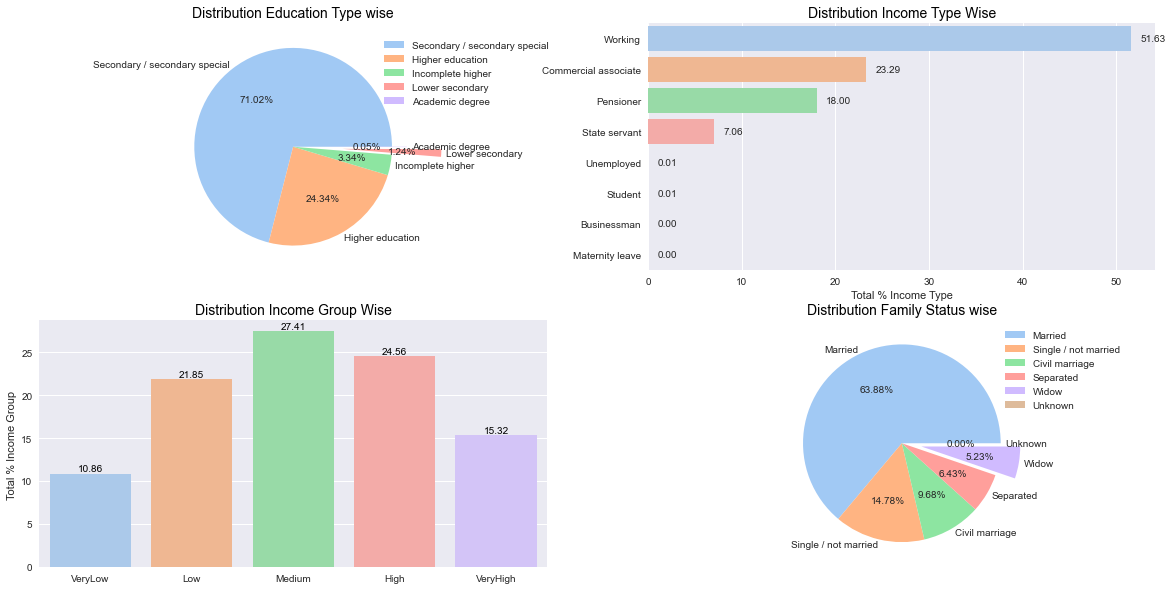

In [404]:
plt.style.use("seaborn")
fig, ax=plt.subplots(2,2,figsize=(20,10))

palette_color = sns.color_palette('pastel')
ax[0][0].pie(inp01.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100,labels=inp01.NAME_EDUCATION_TYPE.value_counts().index,explode=(0,0,0,0.5,0.15),colors=palette_color,autopct='%.2f%%',textprops={'fontsize': 10},labeldistance=1.05)
ax[0][0].set_title("Distribution Education Type wise", fontsize=14,color="black")
ax[0][0].legend(loc=(0.85,0.65))

sns.barplot(x=inp01["NAME_INCOME_TYPE"].value_counts(normalize=True)*100,y=inp01["NAME_INCOME_TYPE"].value_counts().index,palette="pastel",ax=ax[0][1])
ax[0][1].set_title("Distribution Income Type Wise",fontsize=14,color="black")
ax[0][1].set_xlabel("Total % Income Type")

for p in ax[0][1].patches:
    width = p.get_width()    # get bar length
    ax[0][1].text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')

sns.barplot(x=inp01["INCOME_GROUP"].value_counts().index,y=inp01["INCOME_GROUP"].value_counts(normalize=True)*100,palette="pastel",ax=ax[1][0])
ax[1][0].set_title("Distribution Income Group Wise",fontsize=14,color="black")
ax[1][0].set_ylabel("Total % Income Group ")

for p in ax[1][0].patches:
             ax[1][0].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

palette_color = sns.color_palette('pastel')
ax[1][1].pie(inp01.NAME_FAMILY_STATUS.value_counts(normalize=True)*100,labels=inp01.NAME_FAMILY_STATUS.value_counts().index,explode=(0,0,0,0,0.2,0),colors=palette_color,autopct='%.2f%%',textprops={'fontsize': 10},labeldistance=1.05)
ax[1][1].set_title("Distribution Family Status wise", fontsize=14, color="black")
ax[1][1].legend(loc=(0.9,0.62))

plt.show()

#### Insights:

1. Large number of applicants belong to Secondary Education Category.

2. Working Professionals are opting more for loans compared to other categories.

3. Large number of applicants live in House/apartment they own.

4. Married people are the highest among the applicants.

### Numerical Univariate Analysis

In [90]:
# Creating a new variable Credit Income ratio to understand its distribution and further analysis

inp01['CREDIT_INCOME_RATIO']=round((inp01['AMT_CREDIT']/inp01['AMT_INCOME_TOTAL']))

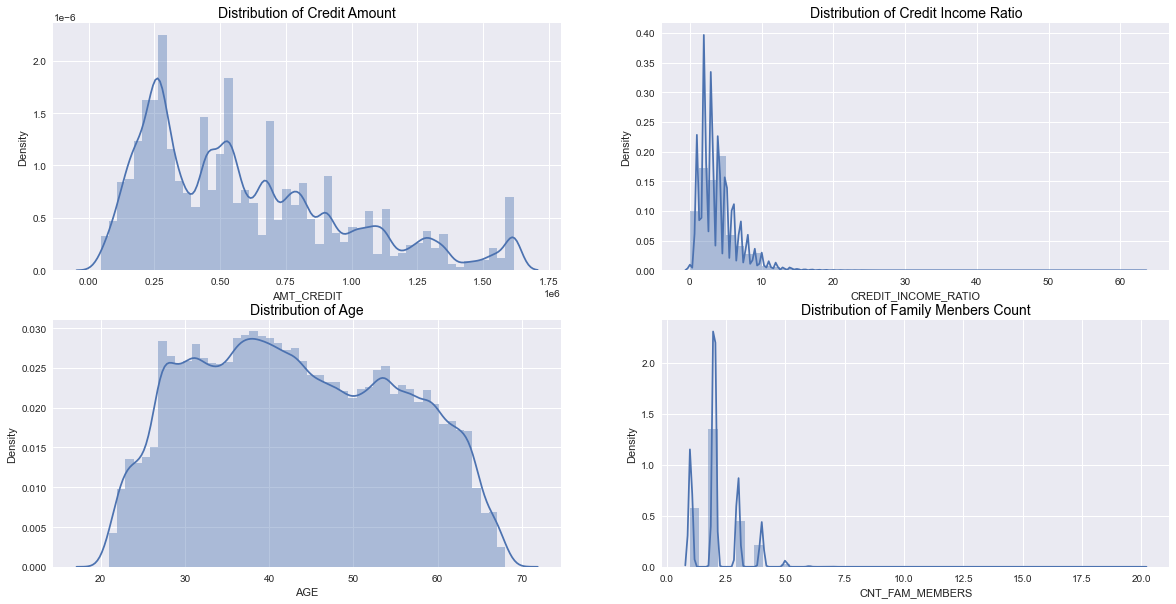

In [101]:
plt.style.use("seaborn")

fig, ax= plt.subplots(2,2,figsize=(20,10))

sns.color_palette('pastel')

sns.distplot(inp01.AMT_CREDIT,ax=ax[0][0])
ax[0][0].set_title("Distribution of Credit Amount",fontsize=14,color='black')

sns.distplot(inp01.CREDIT_INCOME_RATIO,ax=ax[0][1])
ax[0][1].set_title("Distribution of Credit Income Ratio",fontsize=14,color='black')

sns.distplot(inp01.AGE,ax=ax[1][0])
ax[1][0].set_title("Distribution of Age",fontsize=14,color='black')

sns.distplot(inp01.CNT_FAM_MEMBERS,ax=ax[1][1])
ax[1][1].set_title("Distribution of Family Menbers Count",fontsize=14,color='black')

plt.show()

#### Insights:

1. Density of applicants with low Credit Amount was high,this shows most applicants were given low credit.

2. There were very high number of applicants whose Credit to Income Ratio was on lower side.

3. Max number of applicants were of age between 25-40.

4. Small families with count <=3 were among the highest applicants.

## Segmented Univariate Analysis.

To perform this analysis we will split the dataset into two one with payment difficulties(TARGET=1) and other with rest of the cases (TARGET=0) based on our TARGET variable

In [111]:
inp01_d=inp01[inp01.TARGET==1]  # Data set with defaulters
inp01_nd=inp01[inp01.TARGET==0] # Data set with all other cases

In [241]:
inp01_d.drop(columns=["DAYS_BIRTH","DAYS_EMPLOYED"],axis=1,inplace=True)

In [242]:
inp01_nd.drop(columns=["DAYS_BIRTH","DAYS_EMPLOYED"],axis=1,inplace=True)

In [112]:
inp01_d.shape

(24825, 57)

In [113]:
inp01_nd.shape

(282686, 57)

In [114]:
inp01.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EXP,INCOME_GROUP,AGE_GROUP,YEARS_EXP_GROUP,CREDIT_INCOME_RATIO
0,100002,1,Cash loans,Male,N,Y,0,"202,500.00","406,597.50","24,700.50","351,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,9461,637.00,"3,648.00",2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.00,0.00,2.00,0.00,"1,134.00",0.00,0.00,0.00,0.00,0.00,1.00,25,1,High,"(20, 25]","(0.0, 5.0]",2.00
1,100003,0,Cash loans,Female,N,N,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",Family,State servant,Higher education,Married,House / apartment,0.00,16765,"1,188.00","1,186.00",291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1.00,0.00,1.00,0.00,828.00,0.00,0.00,0.00,0.00,0.00,0.00,45,3,VeryHigh,"(40, 45]","(0.0, 5.0]",5.00
2,100004,0,Revolving loans,Male,Y,Y,0,"67,500.00","135,000.00","6,750.00","135,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,19046,225.00,"4,260.00",2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.00,0.00,0.00,0.00,815.00,0.00,0.00,0.00,0.00,0.00,0.00,52,0,VeryLow,"(50, 55]",NaN,2.00
3,100006,0,Cash loans,Female,N,Y,0,"135,000.00","312,682.50","29,686.50","297,000.00",Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,19005,"3,039.00","9,833.00",2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.00,0.00,2.00,0.00,617.00,0.00,0.00,0.00,0.00,0.00,1.00,52,8,Medium,"(50, 55]","(5.0, 10.0]",2.00
4,100007,0,Cash loans,Male,N,Y,0,"121,500.00","513,000.00","21,865.50","513,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,19932,"3,038.00","4,311.00",3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.00,0.00,0.00,0.00,"1,106.00",0.00,0.00,0.00,0.00,0.00,0.00,54,8,Medium,"(50, 55]","(5.0, 10.0]",4.00


#### CODE_GENDER variable

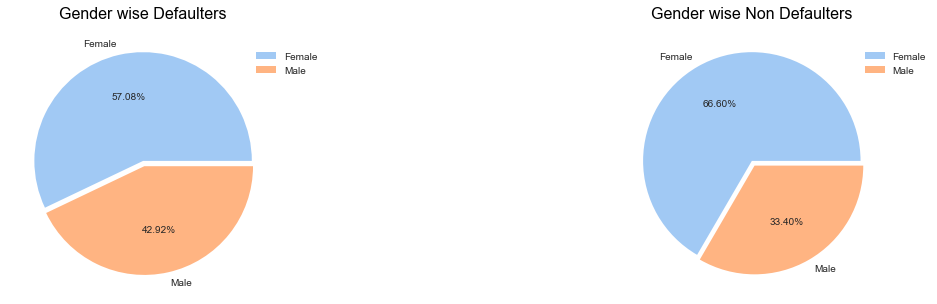

In [203]:
plt.style.use("seaborn")

fig, ax=plt.subplots(1,2,figsize=(20,5))

palette=sns.color_palette("pastel")

ax[0].pie(inp01_d.CODE_GENDER.value_counts(normalize=True)*100, labels=inp01_d.CODE_GENDER.value_counts().index, explode=(0,0.05), colors=palette,autopct='%.2f%%')
ax[0].set_title("Gender wise Defaulters",fontsize=16,color='black')
ax[0].legend(loc=(0.9,0.8))

ax[1].pie(inp01_nd.CODE_GENDER.value_counts(normalize=True)*100, labels=inp01_nd.CODE_GENDER.value_counts().index, explode=(0,0.05), colors=palette,autopct='%.2f%%')
ax[1].set_title("Gender wise Non Defaulters",fontsize=16,color='black')
ax[1].legend(loc=(0.9,0.8))

plt.show()

#### Insights:

Percentage of Females who applied for loans is more than males

-> It is obvious that females constitutes to higher percentage 57.08% with in defaulter segment taking into consideration the total applicants.

-> Rate of defaulters in Female are much lower compared to Males as the % of Female Defaulters is lower than % of Femlale Non Defaulters in contradictory to Males.

#### Asset vaiarbles FLAG_OWN_CAR and FLAG_OWN_REALTY

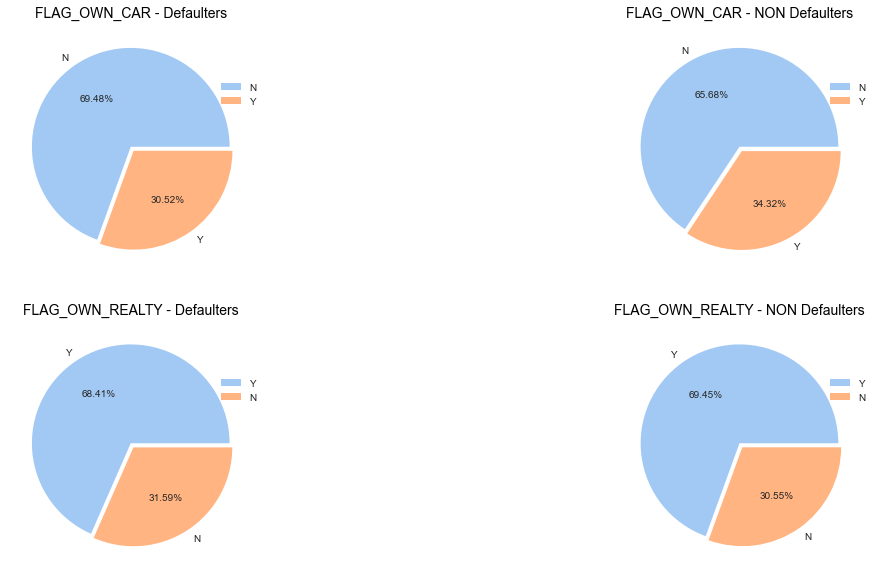

In [148]:
plt.style.use("seaborn")

palette=sns.color_palette("pastel")

fig, ax=plt.subplots(2,2, figsize=(20,10))

ax[0][0].pie(inp01_d.FLAG_OWN_CAR.value_counts(normalize=True)*100, labels=inp01_d.FLAG_OWN_CAR.value_counts().index,explode=(0,0.05),colors=palette, autopct='%.2f%%')
ax[0][0].set_title("FLAG_OWN_CAR - Defaulters",fontsize=14,color='black')
ax[0][0].legend(loc=(0.85,0.65))

ax[0][1].pie(inp01_nd.FLAG_OWN_CAR.value_counts(normalize=True)*100, labels=inp01_nd.FLAG_OWN_CAR.value_counts().index,explode=(0,0.05),colors=palette, autopct='%.2f%%')
ax[0][1].set_title("FLAG_OWN_CAR - NON Defaulters",fontsize=14,color='black')
ax[0][1].legend(loc=(0.85,0.65))

ax[1][0].pie(inp01_d.FLAG_OWN_REALTY.value_counts(normalize=True)*100, labels=inp01_d.FLAG_OWN_REALTY.value_counts().index,explode=(0,0.05),colors=palette, autopct='%.2f%%')
ax[1][0].set_title("FLAG_OWN_REALTY - Defaulters",fontsize=14,color='black')
ax[1][0].legend(loc=(0.85,0.65))

ax[1][1].pie(inp01_nd.FLAG_OWN_REALTY.value_counts(normalize=True)*100, labels=inp01_nd.FLAG_OWN_REALTY.value_counts().index,explode=(0,0.05),colors=palette, autopct='%.2f%%')
ax[1][1].set_title("FLAG_OWN_REALTY - NON Defaulters",fontsize=14,color='black')
ax[1][1].legend(loc=(0.85,0.65))
plt.show()

#### Insights

-> Rate of default of people who doesnot own a car is high compared to those who own a car.

-> Rate of default of people who doesnot own a realty is high compared to those who donot own.

##### From the above we can consider that people who own assets deafult less compared to who dont own.


#### CNT_CHILDREN variable

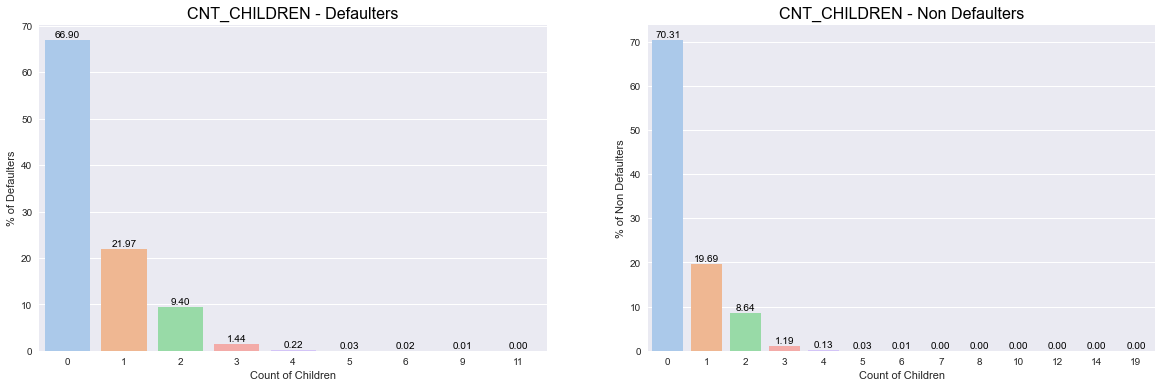

In [177]:
plt.style.use("seaborn")

fig, ax=plt.subplots(1,2,figsize=(20,6))

sns.barplot(x=inp01_d.CNT_CHILDREN.value_counts().index,y=inp01_d.CNT_CHILDREN.value_counts(normalize=True)*100,palette="pastel",ax=ax[0])
ax[0].set_title("CNT_CHILDREN - Defaulters", fontsize=16,color='black')
ax[0].set_xlabel("Count of Children")
ax[0].set_ylabel("% of Defaulters")

# To show data labels
for p in ax[0].patches:
             ax[0].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

sns.barplot(x=inp01_nd.CNT_CHILDREN.value_counts().index,y=inp01_nd.CNT_CHILDREN.value_counts(normalize=True)*100,palette="pastel",ax=ax[1])
ax[1].set_title("CNT_CHILDREN - Non Defaulters", fontsize=16,color='black')
ax[1].set_xlabel("Count of Children")
ax[1].set_ylabel("% of Non Defaulters")


# To show data labels
for p in ax[1].patches:
             ax[1].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')



    
plt.show()

#### Insights:

Rate of default is high in applicants with children compared to those without children


#### INCOME_GROUP and NAME_INCOME_TYPE individual analysis


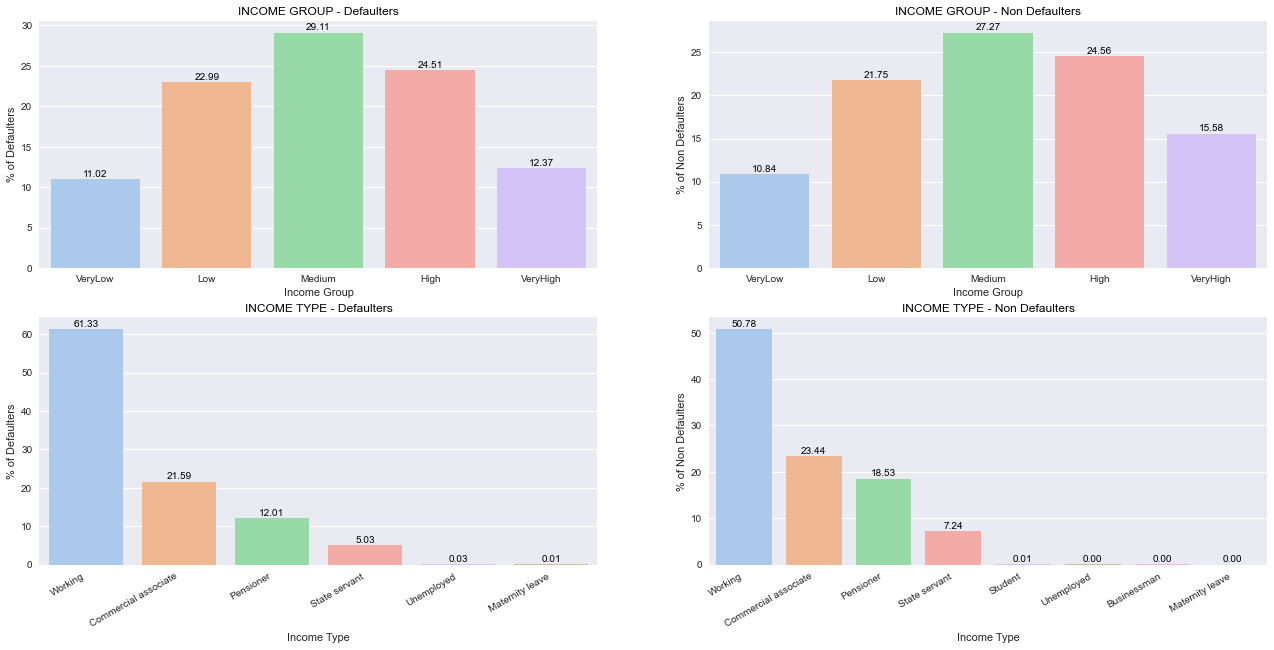

In [200]:
plt.style.use("seaborn")

fig, ax=plt.subplots(2,2,figsize=(22,10))

sns.barplot(x=inp01_d.INCOME_GROUP.value_counts().index,y=inp01_d.INCOME_GROUP.value_counts(normalize=True)*100,palette="pastel",ax=ax[0][0])
ax[0][0].set_title("INCOME GROUP - Defaulters", fontsize=12,color='black')
ax[0][0].set_xlabel("Income Group")
ax[0][0].set_ylabel("% of Defaulters")

# To show data labels
for p in ax[0][0].patches:
             ax[0][0].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

sns.barplot(x=inp01_nd.INCOME_GROUP.value_counts().index,y=inp01_nd.INCOME_GROUP.value_counts(normalize=True)*100,palette="pastel",ax=ax[0][1])
ax[0][1].set_title("INCOME GROUP - Non Defaulters", fontsize=12,color='black')
ax[0][1].set_xlabel("Income Group")
ax[0][1].set_ylabel("% of Non Defaulters")


# To show data labels
for p in ax[0][1].patches:
             ax[0][1].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
                
                
sns.barplot(x=inp01_d.NAME_INCOME_TYPE.value_counts().index,y=inp01_d.NAME_INCOME_TYPE.value_counts(normalize=True)*100,palette="pastel",ax=ax[1][0])
ax[1][0].set_title("INCOME TYPE - Defaulters", fontsize=12,color='black')
ax[1][0].set_xlabel("Income Type")
ax[1][0].set_ylabel("% of Defaulters")
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(), rotation=30, ha="right")

# To show data labels
for p in ax[1][0].patches:
             ax[1][0].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

sns.barplot(x=inp01_nd.NAME_INCOME_TYPE.value_counts().index,y=inp01_nd.NAME_INCOME_TYPE.value_counts(normalize=True)*100,palette="pastel",ax=ax[1][1])
ax[1][1].set_title("INCOME TYPE - Non Defaulters", fontsize=12,color='black')
ax[1][1].set_xlabel("Income Type")
ax[1][1].set_ylabel("% of Non Defaulters")
ax[1][1].set_xticklabels(ax[1][1].get_xticklabels(), rotation=30, ha="right")

# To show data labels
for p in ax[1][1].patches:
             ax[1][1].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')                



    
plt.show()

#### Insights

Working professionals falling into VeryLow, Low and Medium Income levels fall into high rate of default category.
Higher the Income of applicant,lower is the chance of default.



#### NAME_EDUCATION_TYPE and OCCUPATION_TYPE

In [191]:
inp01_d.loc[inp01_d.OCCUPATION_TYPE=="Missing","OCCUPATION_TYPE"]=np.NaN
inp01_nd.loc[inp01_nd.OCCUPATION_TYPE=="Missing","OCCUPATION_TYPE"]=np.NaN

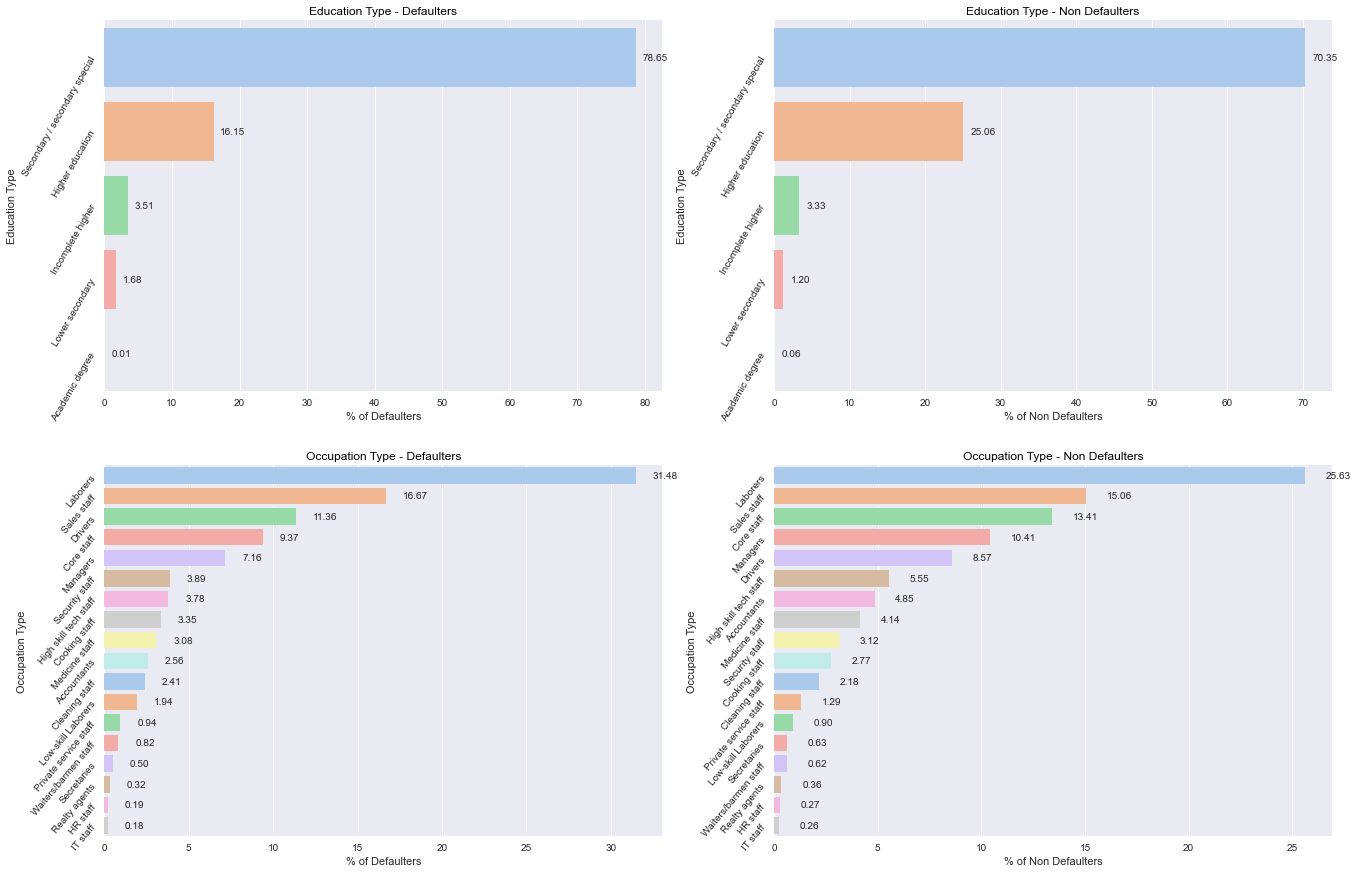

In [349]:
plt.style.use("seaborn")

fig, ax=plt.subplots(2,2,figsize=(22,15))

sns.barplot(x=inp01_d.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100,y=inp01_d.NAME_EDUCATION_TYPE.value_counts().index,palette="pastel",ax=ax[0][0])
ax[0][0].set_title("Education Type - Defaulters", fontsize=12,color='black')
ax[0][0].set_xlabel("% of Defaulters")
ax[0][0].set_ylabel("Education Type")
ax[0][0].set_yticklabels(ax[0][0].get_yticklabels(), rotation=60, ha="right")

for p in ax[0][0].patches:
    width = p.get_width()    # get bar length
    ax[0][0].text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment


sns.barplot(x=inp01_nd.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100,y=inp01_nd.NAME_EDUCATION_TYPE.value_counts().index,palette="pastel",ax=ax[0][1])
ax[0][1].set_title("Education Type - Non Defaulters", fontsize=12,color='black')
ax[0][1].set_xlabel("% of Non Defaulters")
ax[0][1].set_ylabel("Education Type")
ax[0][1].set_yticklabels(ax[0][0].get_yticklabels(), rotation=60, ha="right")

for p in ax[0][1].patches:
    width = p.get_width()    # get bar length
    ax[0][1].text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment
                
                
sns.barplot(x=inp01_d.OCCUPATION_TYPE.value_counts(normalize=True)*100,y=inp01_d.OCCUPATION_TYPE.value_counts().index,palette="pastel",ax=ax[1][0])
ax[1][0].set_title("Occupation Type - Defaulters", fontsize=12,color='black')
ax[1][0].set_xlabel("% of Defaulters")
ax[1][0].set_ylabel("Occupation Type")
ax[1][0].set_yticklabels(ax[1][0].get_yticklabels(), rotation=50, ha="right")

for p in ax[1][0].patches:
    width = p.get_width()    # get bar length
    ax[1][0].text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment

sns.barplot(x=inp01_nd.OCCUPATION_TYPE.value_counts(normalize=True)*100,y=inp01_nd.OCCUPATION_TYPE.value_counts().index,palette="pastel",ax=ax[1][1])
ax[1][1].set_title("Occupation Type - Non Defaulters", fontsize=12,color='black')
ax[1][1].set_xlabel("% of Non Defaulters")
ax[1][1].set_ylabel("Occupation Type")
ax[1][1].set_yticklabels(ax[1][1].get_yticklabels(), rotation=50, ha="right")

for p in ax[1][1].patches:
    width = p.get_width()    # get bar length
    ax[1][1].text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment
              
   
plt.show()

#### Insights

-> Rate of defaulters is high among people with Secondary or Lower Secondary Education.Higher the education,lower the risk of default.

-> Applicants with Laborers,Salesstaff,Drivers and Security Staff are at high risk of being defaulters




#### AGE_GROUP and YEARS_OF _EXP individual analysis

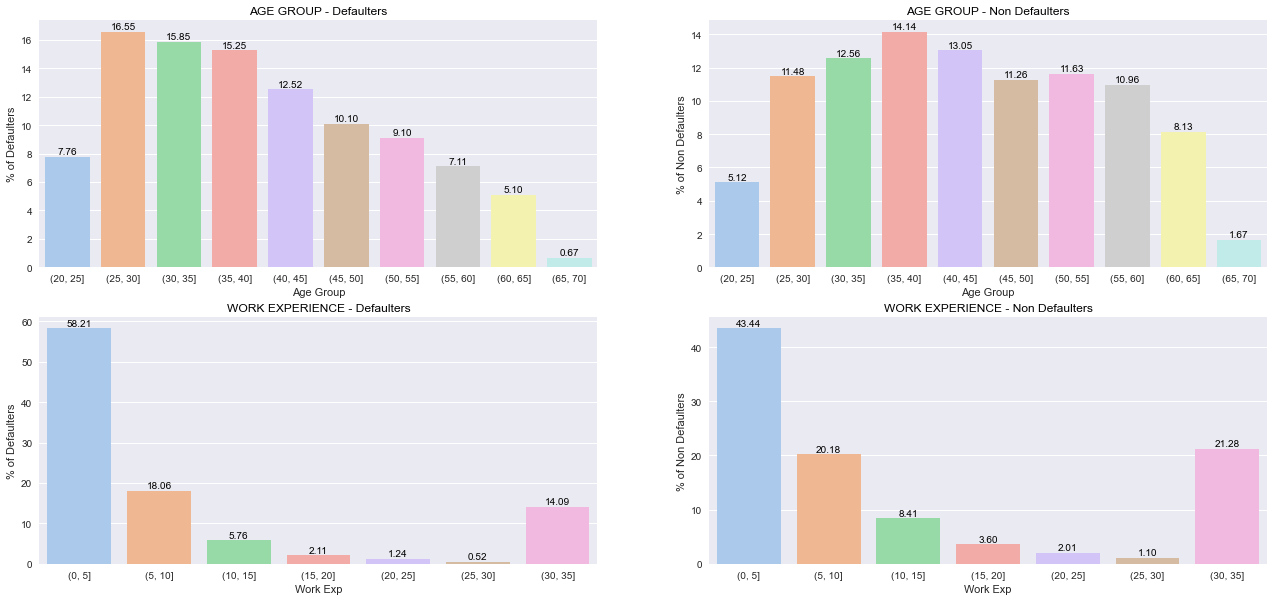

In [202]:
plt.style.use("seaborn")

fig, ax=plt.subplots(2,2,figsize=(22,10))

sns.barplot(x=inp01_d.AGE_GROUP.value_counts().index,y=inp01_d.AGE_GROUP.value_counts(normalize=True)*100,palette="pastel",ax=ax[0][0])
ax[0][0].set_title("AGE GROUP - Defaulters", fontsize=12,color='black')
ax[0][0].set_xlabel("Age Group")
ax[0][0].set_ylabel("% of Defaulters")

# To show data labels
for p in ax[0][0].patches:
             ax[0][0].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

sns.barplot(x=inp01_nd.AGE_GROUP.value_counts().index,y=inp01_nd.AGE_GROUP.value_counts(normalize=True)*100,palette="pastel",ax=ax[0][1])
ax[0][1].set_title("AGE GROUP - Non Defaulters", fontsize=12,color='black')
ax[0][1].set_xlabel("Age Group")
ax[0][1].set_ylabel("% of Non Defaulters")


# To show data labels
for p in ax[0][1].patches:
             ax[0][1].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
                
                
sns.barplot(x=inp01_d.YEARS_EXP_GROUP.value_counts().index,y=inp01_d.YEARS_EXP_GROUP.value_counts(normalize=True)*100,palette="pastel",ax=ax[1][0])
ax[1][0].set_title("WORK EXPERIENCE - Defaulters", fontsize=12,color='black')
ax[1][0].set_xlabel("Work Exp")
ax[1][0].set_ylabel("% of Defaulters")


# To show data labels
for p in ax[1][0].patches:
             ax[1][0].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

sns.barplot(x=inp01_nd.YEARS_EXP_GROUP.value_counts().index,y=inp01_nd.YEARS_EXP_GROUP.value_counts(normalize=True)*100,palette="pastel",ax=ax[1][1])
ax[1][1].set_title("WORK EXPERIENCE - Non Defaulters", fontsize=12,color='black')
ax[1][1].set_xlabel("Work Exp")
ax[1][1].set_ylabel("% of Non Defaulters")


# To show data labels
for p in ax[1][1].patches:
             ax[1][1].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')                



    
plt.show()



#### Insights

-> Applicants falling into Age group 20 to 40 are at high risk of being defaulters.

-> Applicants whose work experience is less than 5 years defaulted more.




#### NAME_FAMILY_STATUS variable

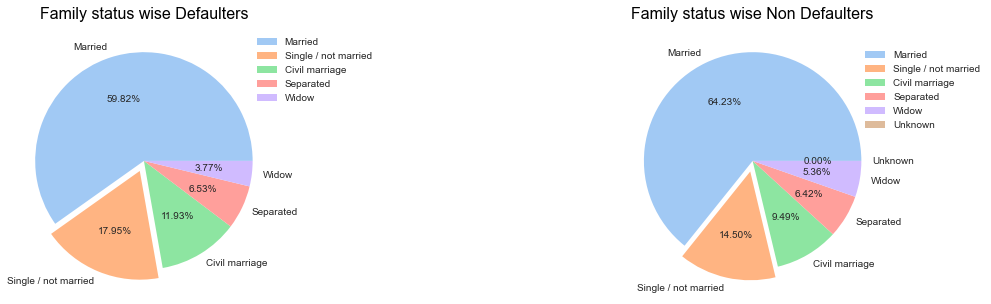

In [213]:
plt.style.use("seaborn")

fig, ax=plt.subplots(1,2,figsize=(20,5))

palette=sns.color_palette("pastel")

ax[0].pie(inp01_d.NAME_FAMILY_STATUS.value_counts(normalize=True)*100, labels=inp01_d.NAME_FAMILY_STATUS.value_counts().index,explode=(0,0.1,0,0,0), colors=palette,autopct='%.2f%%')
ax[0].set_title("Family status wise Defaulters",fontsize=16,color='black')
ax[0].legend(loc=(0.9,0.7))

ax[1].pie(inp01_nd.NAME_FAMILY_STATUS.value_counts(normalize=True)*100, labels=inp01_nd.NAME_FAMILY_STATUS.value_counts().index,explode=(0,0.1,0,0,0,0), colors=palette,autopct='%.2f%%')
ax[1].set_title("Family status wise Non Defaulters",fontsize=16,color='black')
ax[1].legend(loc=(0.9,0.6))

plt.show()

#### Insights

Single, Civil marriage and Seperated people have the risk of default



#### REGION_RATING_CLIENT

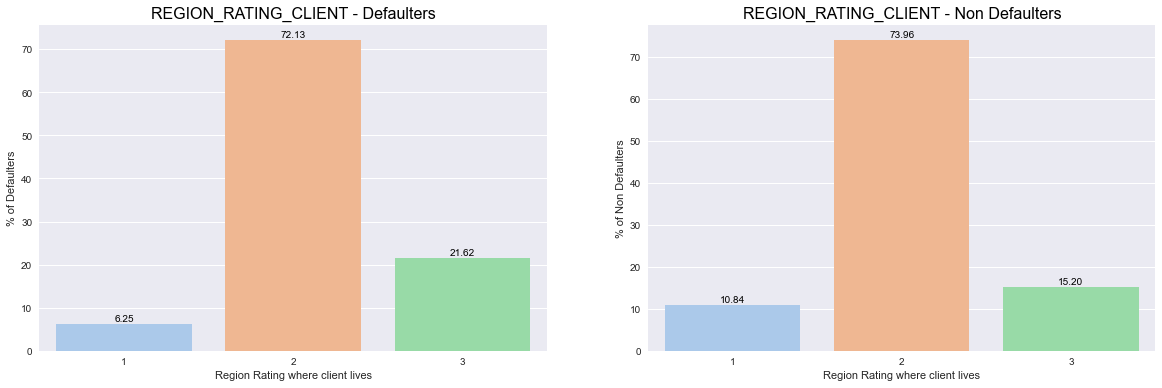

In [313]:
plt.style.use("seaborn")

fig, ax=plt.subplots(1,2,figsize=(20,6))

sns.barplot(x=inp01_d.REGION_RATING_CLIENT.value_counts().index,y=inp01_d.REGION_RATING_CLIENT.value_counts(normalize=True)*100,palette="pastel",ax=ax[0])
ax[0].set_title("REGION_RATING_CLIENT - Defaulters", fontsize=16,color='black')
ax[0].set_xlabel("Region Rating where client lives")
ax[0].set_ylabel("% of Defaulters")

# To show data labels
for p in ax[0].patches:
             ax[0].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

sns.barplot(x=inp01_nd.REGION_RATING_CLIENT.value_counts().index,y=inp01_nd.REGION_RATING_CLIENT.value_counts(normalize=True)*100,palette="pastel",ax=ax[1])
ax[1].set_title("REGION_RATING_CLIENT - Non Defaulters", fontsize=16,color='black')
ax[1].set_xlabel("Region Rating where client lives")
ax[1].set_ylabel("% of Non Defaulters")


# To show data labels
for p in ax[1].patches:
             ax[1].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')



    
plt.show()

#### Insight

Applicants from Regions rated 2 and 3 by the bank seem to be at high risk of being defaulters.




# Bivariate Analysis



### Numeric-Numeric analysis

To perform this analysis we need to understand the correlation among the variables.

Need to find top 10 correlated variables in each of the segmented datasets


#### Finding top 10 correlated varaibales in defaulters dataset. 

In [261]:
inp01_d_corr=inp01_d.corr()

In [262]:
inp01_d_corr=inp01_d_corr.where(np.triu(np.ones(inp01_d_corr.shape),k=1).astype(np.bool)).unstack().reset_index()

In [263]:
inp01_d_corr=inp01_d_corr.rename(columns={"level0":"Column1","level_1":"Column2",0:"Correlation"})

In [265]:
inp01_d_corr.Correlation.dropna(inplace=True)

In [266]:
inp01_d_corr["Correlation"]=inp01_d_corr.Correlation.apply(lambda x: x*100)

In [267]:
inp01_d_corr["Abs_Correlation"]=inp01_d_corr.Correlation.apply(lambda x: abs(x))

In [268]:
inp01_d_corr=inp01_d_corr.sort_values(by="Abs_Correlation",ascending=False)

In [269]:
# Top10 Correlated variables in Defaulters dataset
inp01_d_corr.head(10)

,level_0,Column2,Correlation,Abs_Correlation
1146,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,99.79,99.79
244,AMT_GOODS_PRICE,AMT_CREDIT,98.18,98.18
737,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,95.66,95.66
1531,YEARS_EXP,FLAG_EMP_PHONE,-90.23,90.23
642,CNT_FAM_MEMBERS,CNT_CHILDREN,88.55,88.55
901,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,84.79,84.79
1024,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,77.85,77.85
245,AMT_GOODS_PRICE,AMT_ANNUITY,76.03,76.03
204,AMT_ANNUITY,AMT_CREDIT,76.01,76.01
1564,CREDIT_INCOME_RATIO,AMT_CREDIT,65.47,65.47


#### Finding Top10 correleated variables in Non Defaulters dataset 

In [274]:
inp01_nd_corr=inp01_nd.corr()

In [275]:
inp01_nd_corr=inp01_nd_corr.where(np.triu(np.ones(inp01_nd_corr.shape),k=1).astype(np.bool)).unstack().reset_index()

In [276]:
inp01_nd_corr=inp01_nd_corr.rename(columns={"level0":"Column1","level_1":"Column2",0:"Correlation"})
inp01_nd_corr.Correlation.dropna(inplace=True)
inp01_nd_corr["Correlation"]=inp01_nd_corr.Correlation.apply(lambda x: x*100)
inp01_nd_corr["Abs_Correlation"]=inp01_nd_corr.Correlation.apply(lambda x: abs(x))
inp01_nd_corr=inp01_nd_corr.sort_values(by="Abs_Correlation",ascending=False)

In [277]:
# Top10 Correlated variables in Non Defaulters dataset
inp01_nd_corr.head(10)

,level_0,Column2,Correlation,Abs_Correlation
1146,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,99.79,99.79
244,AMT_GOODS_PRICE,AMT_CREDIT,98.56,98.56
737,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,95.01,95.01
1531,YEARS_EXP,FLAG_EMP_PHONE,-88.74,88.74
642,CNT_FAM_MEMBERS,CNT_CHILDREN,87.86,87.86
901,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,86.19,86.19
1024,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,83.04,83.04
245,AMT_GOODS_PRICE,AMT_ANNUITY,79.73,79.73
204,AMT_ANNUITY,AMT_CREDIT,79.48,79.48
1557,YEARS_EXP,AGE,67.48,67.48


 
#### From the above top10 correlations, below varaiables can be used for our analysis as they are correlated in both Defaulters and Non Defaulters datasets

1. AMT_GOODS_PRICE - AMT_CREDIT

2. AMT_GOODS_PRICE - ANNUITY

3. AMT_ANNUITY - AMT_CREDIT



#### AMT_GOODS_PRICE  vs AMT_CREDIT


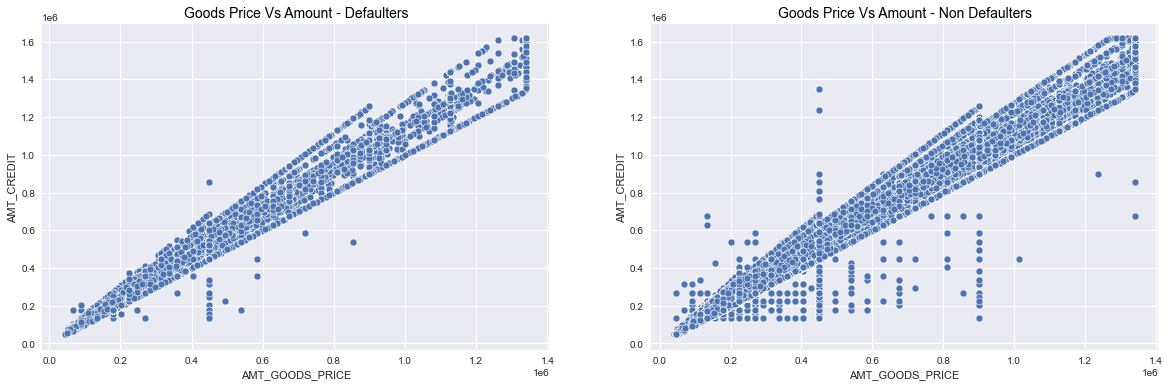

In [298]:
plt.style.use("seaborn")

fig, ax=plt.subplots(1,2, figsize=(20,6))

sns.scatterplot(data=inp01_d,x=inp01_d.AMT_GOODS_PRICE,y=inp01_d.AMT_CREDIT,ax=ax[0])
ax[0].set_title("Goods Price Vs Amount - Defaulters",fontsize=14,color='black')

sns.scatterplot(data=inp01_nd,x=inp01_nd.AMT_GOODS_PRICE,y=inp01_nd.AMT_CREDIT,ax=ax[1])
ax[1].set_title("Goods Price Vs Amount - Non Defaulters",fontsize=14,color='black')

plt.show()

 #### Insights

Its clear that the AMT_GOODS_PRICE and AMT_CREDIT vary linearly.Higher the goods price for the consumer loans,higher was the Credit for both Defaulters and Non Defaulters.

We can observe the density of defaulters is decreases as Credit amount increases.Applicants taking lower credits are most likely to be the defaulters.



#### AMT_CREDIT vs AMT_ANNUITY


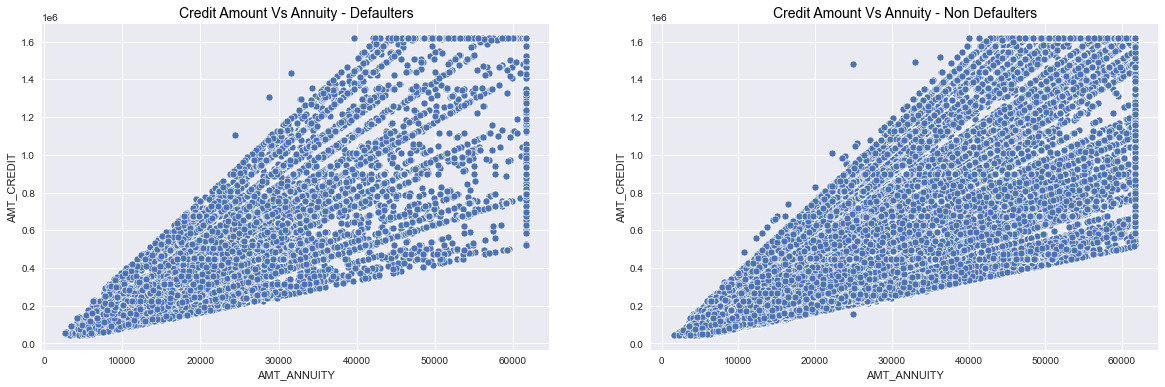

In [301]:
plt.style.use("seaborn")

fig, ax=plt.subplots(1,2, figsize=(20,6))

sns.scatterplot(data=inp01_d,x=inp01_d.AMT_ANNUITY,y=inp01_d.AMT_CREDIT,ax=ax[0])
ax[0].set_title("Credit Amount Vs Annuity - Defaulters",fontsize=14,color='black')

sns.scatterplot(data=inp01_nd,x=inp01_nd.AMT_ANNUITY,y=inp01_nd.AMT_CREDIT,ax=ax[1])
ax[1].set_title("Credit Amount Vs Annuity - Non Defaulters",fontsize=14,color='black')

plt.show()

 
#### Insights

Again higher density of defaulters found at lower Credit and low Annuity.Applicants with higher annuity seem to most likely repay on time.



#### Pairplot to understand AMT_CREDIT, AMT_ANNUITY, AMT_GOODS Price

In [306]:
inp01_subset=inp01[["AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","TARGET"]]

<Figure size 1440x720 with 0 Axes>

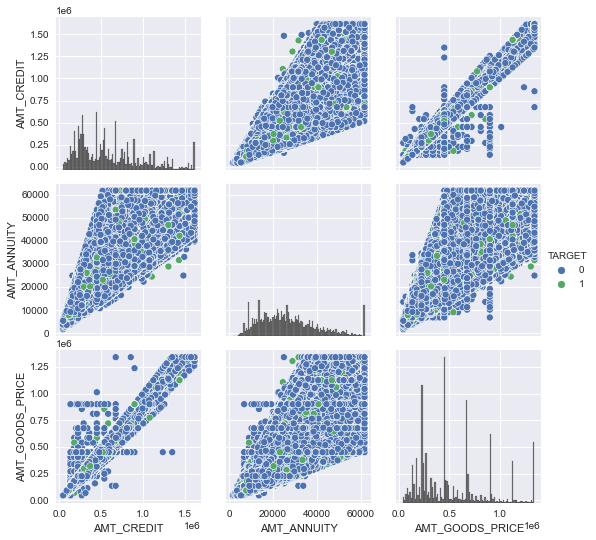

In [319]:
plt.style.use("seaborn")
plt.figure(figsize=(20,10))

g = sns.PairGrid(inp01_subset, hue="TARGET")
g.map_diag(sns.histplot, hue=None, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()

plt.show()



#### Insight

AMT_CREDIT,AMT_ANNUITY and AMT_GOODS+PRICE are linearly related to each other,if one increases other follows the same.

Defaulters density in all 3 features seems to be more at lower levels than higher.


#### Correlation Heatmap

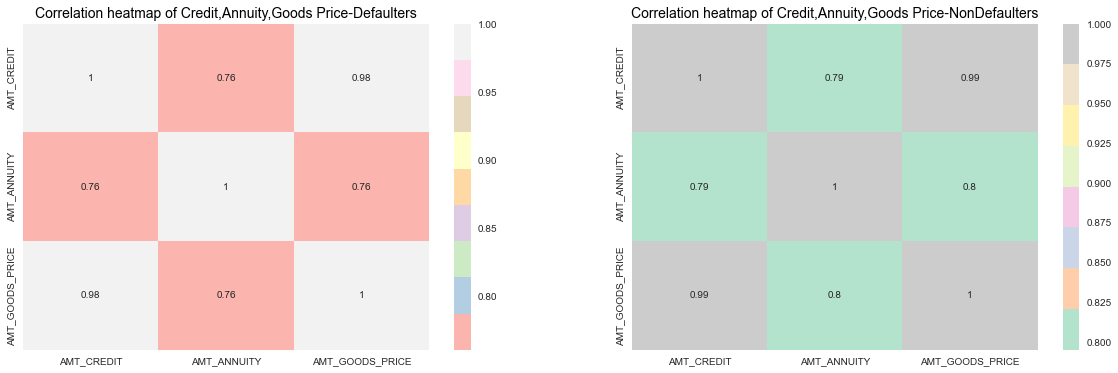

In [331]:
#plot the correlation matrix of Credit, Annuity and age in Goods Price defaulters and non defaulters dataframes.
plt.style.use("seaborn")

fig, ax=plt.subplots(1,2,figsize=(20,6))


sns.heatmap(inp01_d[["AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]].corr(),annot=True,cmap="Pastel1",ax=ax[0])
ax[0].set_title("Correlation heatmap of Credit,Annuity,Goods Price-Defaulters",fontsize=14,color="black")

sns.heatmap(inp01_nd[["AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]].corr(),annot=True,cmap="Pastel2",ax=ax[1])
ax[1].set_title("Correlation heatmap of Credit,Annuity,Goods Price-NonDefaulters",fontsize=14,color="black")

plt.show()



#### Categorical - Numerical analysis


##### INCOME GROUP vs CREDIT and INCOME TYPE  vs CREDIT

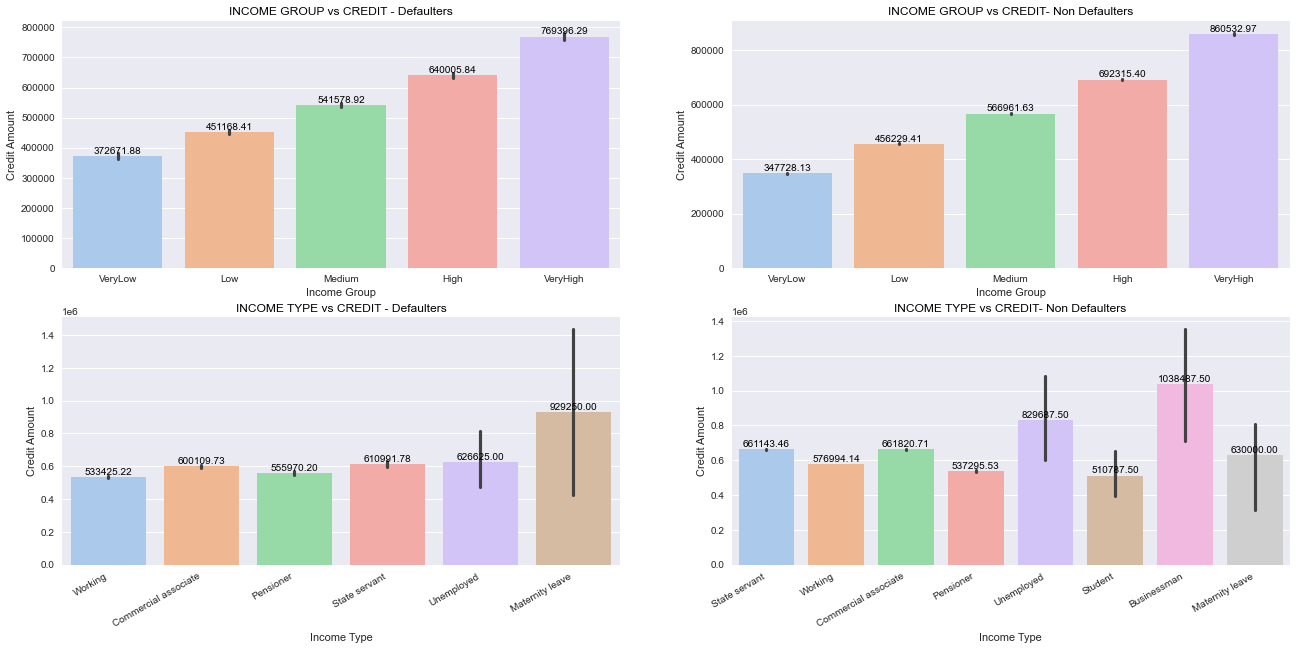

In [358]:
# plt.style.use("seaborn")

fig, ax=plt.subplots(2,2,figsize=(22,10))

sns.barplot(x=inp01_d.INCOME_GROUP,y=inp01_d.AMT_CREDIT,palette="pastel",ax=ax[0][0])
ax[0][0].set_title("INCOME GROUP vs CREDIT - Defaulters", fontsize=12,color='black')
ax[0][0].set_xlabel("Income Group")
ax[0][0].set_ylabel("Credit Amount")

# To show data labels
for p in ax[0][0].patches:
             ax[0][0].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

sns.barplot(x=inp01_nd.INCOME_GROUP,y=inp01_nd.AMT_CREDIT,palette="pastel",ax=ax[0][1])
ax[0][1].set_title("INCOME GROUP vs CREDIT- Non Defaulters", fontsize=12,color='black')
ax[0][1].set_xlabel("Income Group")
ax[0][1].set_ylabel("Credit Amount")


# To show data labels
for p in ax[0][1].patches:
             ax[0][1].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
                
                
sns.barplot(x=inp01_d.NAME_INCOME_TYPE,y=inp01_d.AMT_CREDIT,palette="pastel",ax=ax[1][0])
ax[1][0].set_title("INCOME TYPE vs CREDIT - Defaulters", fontsize=12,color='black')
ax[1][0].set_xlabel("Income Type")
ax[1][0].set_ylabel("Credit Amount")
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(), rotation=30, ha="right")

# To show data labels
for p in ax[1][0].patches:
             ax[1][0].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

sns.barplot(x=inp01_nd.NAME_INCOME_TYPE,y=inp01_nd.AMT_CREDIT,palette="pastel",ax=ax[1][1])
ax[1][1].set_title("INCOME TYPE vs CREDIT- Non Defaulters", fontsize=12,color='black')
ax[1][1].set_xlabel("Income Type")
ax[1][1].set_ylabel("Credit Amount")
ax[1][1].set_xticklabels(ax[1][1].get_xticklabels(), rotation=30, ha="right")

# To show data labels
for p in ax[1][1].patches:
             ax[1][1].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')                



    
plt.show()

#### Insights
Average Credit amount is more for defaulters than Non Defaulters for Very low income group.More Credit is getting loss from this group than getting payed back.

Pensioners and Maternity leave applicants average credit amount is very high when they default its a loss to the organization.

##### EDUCATION_TYPE and OCCUPATION TYPE vs CREDIT

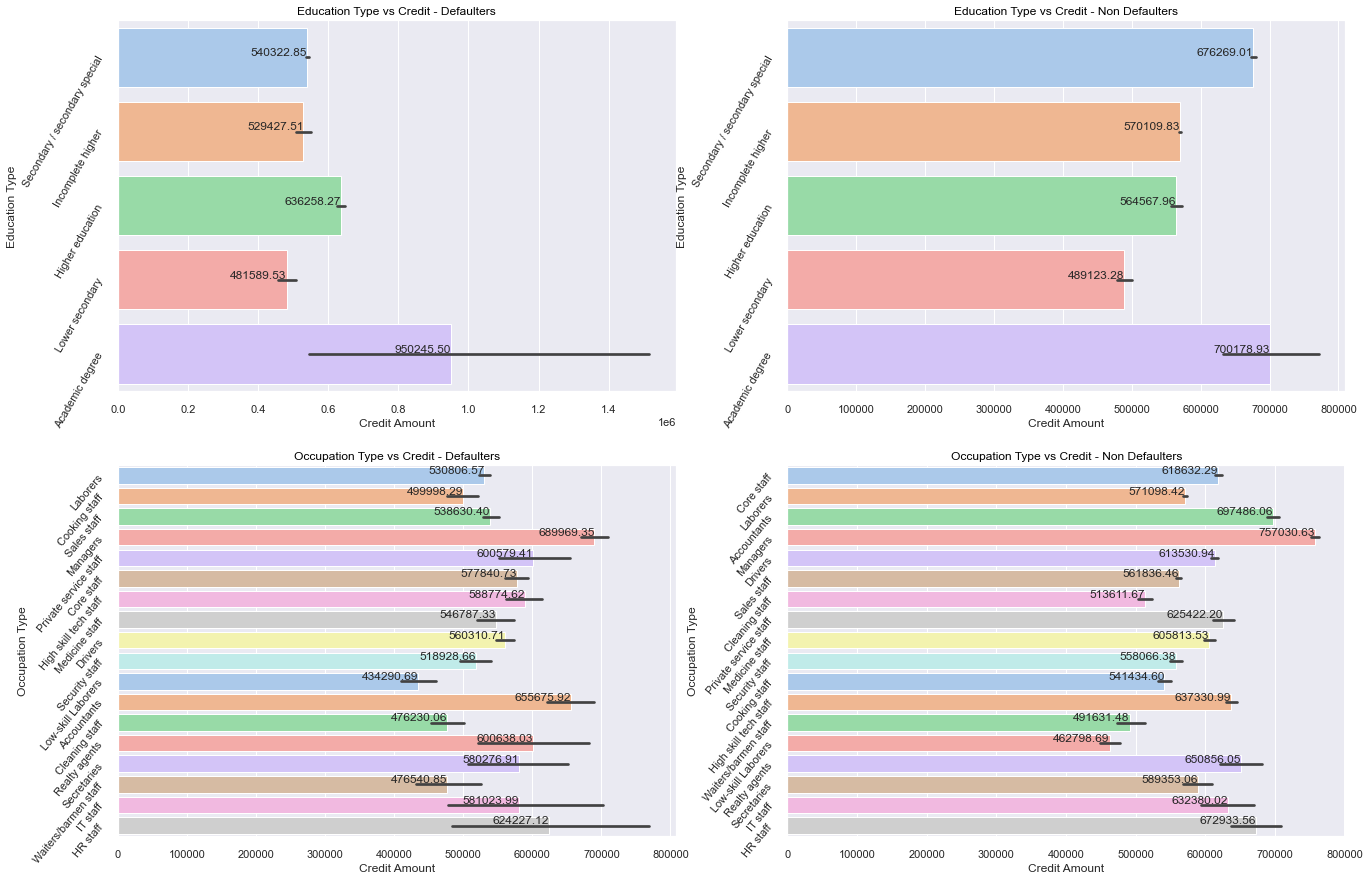

In [539]:
# plt.style.use("seaborn")

fig, ax=plt.subplots(2,2,figsize=(22,15))

sns.barplot(x=inp01_d.AMT_CREDIT,y=inp01_d.NAME_EDUCATION_TYPE,palette="pastel",ax=ax[0][0])
ax[0][0].set_title("Education Type vs Credit - Defaulters", fontsize=12,color='black')
ax[0][0].set_xlabel("Credit Amount")
ax[0][0].set_ylabel("Education Type")
ax[0][0].set_yticklabels(ax[0][0].get_yticklabels(), rotation=60, ha="right")

for p in ax[0][0].patches:
    width = p.get_width()    # get bar length
    ax[0][0].text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'right',   # horizontal alignment
            va = 'bottom')  # vertical alignment


sns.barplot(x=inp01_nd.AMT_CREDIT,y=inp01_nd.NAME_EDUCATION_TYPE,palette="pastel",ax=ax[0][1])
ax[0][1].set_title("Education Type vs Credit - Non Defaulters", fontsize=12,color='black')
ax[0][1].set_xlabel("Credit Amount")
ax[0][1].set_ylabel("Education Type")
ax[0][1].set_yticklabels(ax[0][0].get_yticklabels(), rotation=60, ha="right")

for p in ax[0][1].patches:
    width = p.get_width()    # get bar length
    ax[0][1].text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'right',   # horizontal alignment
            va = 'bottom')  # vertical alignment
                
                
sns.barplot(x=inp01_d.AMT_CREDIT,y=inp01_d.OCCUPATION_TYPE,palette="pastel",ax=ax[1][0])
ax[1][0].set_title("Occupation Type vs Credit - Defaulters", fontsize=12,color='black')
ax[1][0].set_xlabel("Credit Amount")
ax[1][0].set_ylabel("Occupation Type")
ax[1][0].set_yticklabels(ax[1][0].get_yticklabels(), rotation=50, ha="right")

for p in ax[1][0].patches:
    width = p.get_width()    # get bar length
    ax[1][0].text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'right',   # horizontal alignment
            va = 'bottom')  # vertical alignment

sns.barplot(x=inp01_nd.AMT_CREDIT,y=inp01_nd.OCCUPATION_TYPE,palette="pastel",ax=ax[1][1])
ax[1][1].set_title("Occupation Type vs Credit - Non Defaulters", fontsize=12,color='black')
ax[1][1].set_xlabel("Credit Amount")
ax[1][1].set_ylabel("Occupation Type")
ax[1][1].set_yticklabels(ax[1][1].get_yticklabels(), rotation=50, ha="right")

for p in ax[1][1].patches:
    width = p.get_width()    # get bar length
    ax[1][1].text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'right',   # horizontal alignment
            va = 'bottom')  # vertical alignment
              
   
plt.show()

#### Insight
Though the less educated people constitute to defaulters more, higher education category is likely to default more credit than pay back


##### AGE_GROUP and YEARS_EXP vs CREDIT

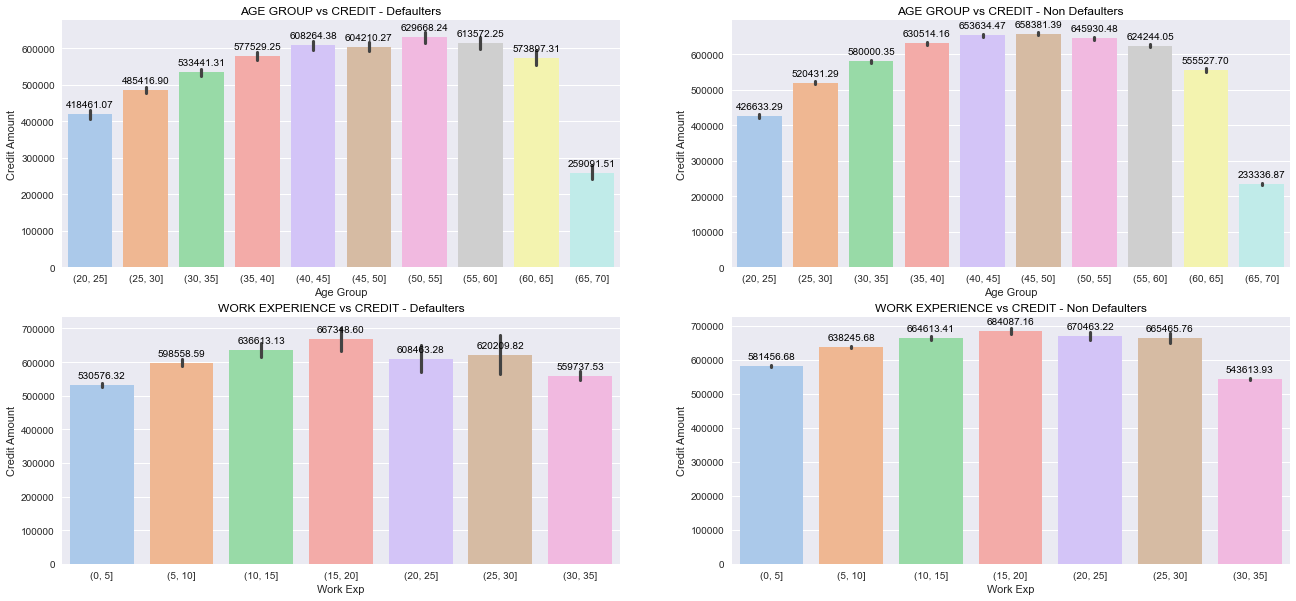

In [369]:
plt.style.use("seaborn")

fig, ax=plt.subplots(2,2,figsize=(22,10))

sns.barplot(x=inp01_d.AGE_GROUP,y=inp01_d.AMT_CREDIT,palette="pastel",ax=ax[0][0])
ax[0][0].set_title("AGE GROUP vs CREDIT - Defaulters", fontsize=12,color='black')
ax[0][0].set_xlabel("Age Group")
ax[0][0].set_ylabel("Credit Amount")

# To show data labels
for p in ax[0][0].patches:
             ax[0][0].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

sns.barplot(x=inp01_nd.AGE_GROUP,y=inp01_nd.AMT_CREDIT,palette="pastel",ax=ax[0][1])
ax[0][1].set_title("AGE GROUP vs CREDIT - Non Defaulters", fontsize=12,color='black')
ax[0][1].set_xlabel("Age Group")
ax[0][1].set_ylabel("Credit Amount")


# To show data labels
for p in ax[0][1].patches:
             ax[0][1].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
                
                
sns.barplot(x=inp01_d.YEARS_EXP_GROUP,y=inp01_d.AMT_CREDIT,palette="pastel",ax=ax[1][0])
ax[1][0].set_title("WORK EXPERIENCE vs CREDIT - Defaulters", fontsize=12,color='black')
ax[1][0].set_xlabel("Work Exp")
ax[1][0].set_ylabel("Credit Amount")


# To show data labels
for p in ax[1][0].patches:
             ax[1][0].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

sns.barplot(x=inp01_nd.YEARS_EXP_GROUP,y=inp01_nd.AMT_CREDIT,palette="pastel",ax=ax[1][1])
ax[1][1].set_title("WORK EXPERIENCE vs CREDIT - Non Defaulters", fontsize=12,color='black')
ax[1][1].set_xlabel("Work Exp")
ax[1][1].set_ylabel("Credit Amount")


# To show data labels
for p in ax[1][1].patches:
             ax[1][1].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')                



    
plt.show()

#### Insight

Age group >60 has higher default of Credit compared to repay.Also lending higher credit to applicants with workexperince more than 30 can lead to higher credit loss due to default.


##### GENDER and FAMILY STATUS vs CREDIT

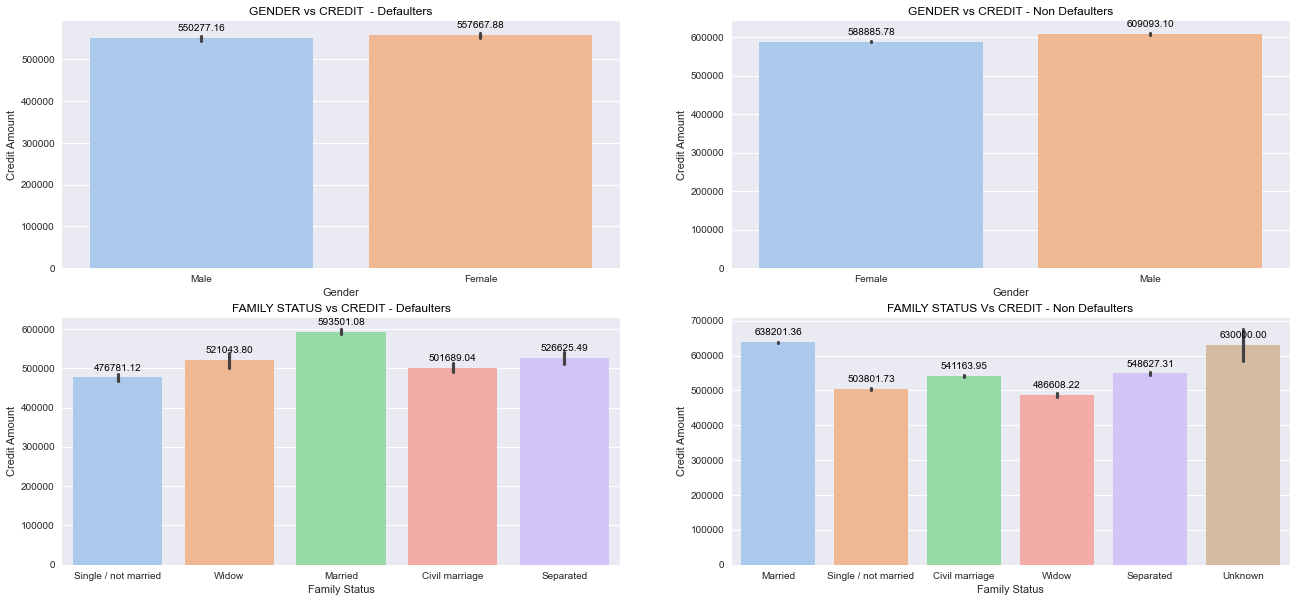

In [371]:
plt.style.use("seaborn")

fig, ax=plt.subplots(2,2,figsize=(22,10))

sns.barplot(x=inp01_d.CODE_GENDER,y=inp01_d.AMT_CREDIT,palette="pastel",ax=ax[0][0])
ax[0][0].set_title("GENDER vs CREDIT  - Defaulters", fontsize=12,color='black')
ax[0][0].set_xlabel("Gender")
ax[0][0].set_ylabel("Credit Amount")

# To show data labels
for p in ax[0][0].patches:
             ax[0][0].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

sns.barplot(x=inp01_nd.CODE_GENDER,y=inp01_nd.AMT_CREDIT,palette="pastel",ax=ax[0][1])
ax[0][1].set_title("GENDER vs CREDIT - Non Defaulters", fontsize=12,color='black')
ax[0][1].set_xlabel("Gender")
ax[0][1].set_ylabel("Credit Amount")


# To show data labels
for p in ax[0][1].patches:
             ax[0][1].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
                
                
sns.barplot(x=inp01_d.NAME_FAMILY_STATUS,y=inp01_d.AMT_CREDIT,palette="pastel",ax=ax[1][0])
ax[1][0].set_title("FAMILY STATUS vs CREDIT - Defaulters", fontsize=12,color='black')
ax[1][0].set_xlabel("Family Status")
ax[1][0].set_ylabel("Credit Amount")


# To show data labels
for p in ax[1][0].patches:
             ax[1][0].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

sns.barplot(x=inp01_nd.NAME_FAMILY_STATUS,y=inp01_nd.AMT_CREDIT,palette="pastel",ax=ax[1][1])
ax[1][1].set_title("FAMILY STATUS Vs CREDIT - Non Defaulters", fontsize=12,color='black')
ax[1][1].set_xlabel("Family Status")
ax[1][1].set_ylabel("Credit Amount")


# To show data labels
for p in ax[1][1].patches:
             ax[1][1].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')                



    
plt.show()

In [372]:
##### FLAG_OWN_CAR and FALG_OWN_REALTY vs CREDIT

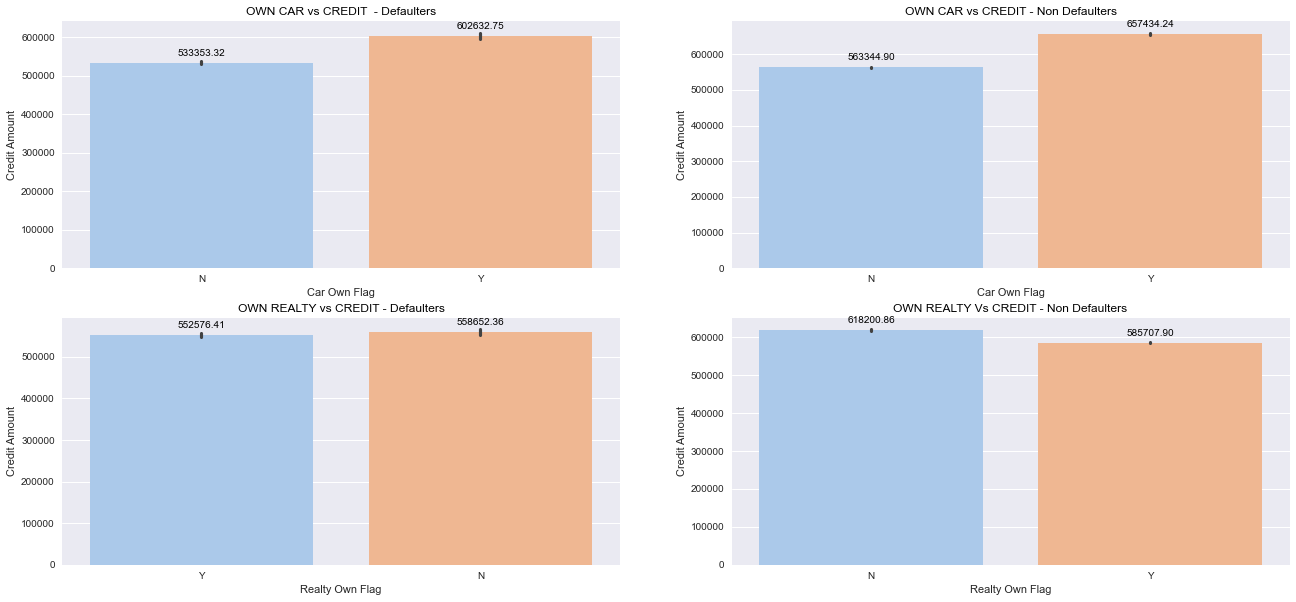

In [373]:
plt.style.use("seaborn")

fig, ax=plt.subplots(2,2,figsize=(22,10))

sns.barplot(x=inp01_d.FLAG_OWN_CAR,y=inp01_d.AMT_CREDIT,palette="pastel",ax=ax[0][0])
ax[0][0].set_title("OWN CAR vs CREDIT  - Defaulters", fontsize=12,color='black')
ax[0][0].set_xlabel("Car Own Flag")
ax[0][0].set_ylabel("Credit Amount")

# To show data labels
for p in ax[0][0].patches:
             ax[0][0].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

sns.barplot(x=inp01_nd.FLAG_OWN_CAR,y=inp01_nd.AMT_CREDIT,palette="pastel",ax=ax[0][1])
ax[0][1].set_title("OWN CAR vs CREDIT - Non Defaulters", fontsize=12,color='black')
ax[0][1].set_xlabel("Car Own Flag")
ax[0][1].set_ylabel("Credit Amount")


# To show data labels
for p in ax[0][1].patches:
             ax[0][1].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
                
                
sns.barplot(x=inp01_d.FLAG_OWN_REALTY,y=inp01_d.AMT_CREDIT,palette="pastel",ax=ax[1][0])
ax[1][0].set_title("OWN REALTY vs CREDIT - Defaulters", fontsize=12,color='black')
ax[1][0].set_xlabel("Realty Own Flag")
ax[1][0].set_ylabel("Credit Amount")


# To show data labels
for p in ax[1][0].patches:
             ax[1][0].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

sns.barplot(x=inp01_nd.FLAG_OWN_REALTY,y=inp01_nd.AMT_CREDIT,palette="pastel",ax=ax[1][1])
ax[1][1].set_title("OWN REALTY Vs CREDIT - Non Defaulters", fontsize=12,color='black')
ax[1][1].set_xlabel("Realty Own Flag")
ax[1][1].set_ylabel("Credit Amount")


# To show data labels
for p in ax[1][1].patches:
             ax[1][1].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')                



    
plt.show()

##### CNT_CHILDREN and CNT_FAMILY_MEMBERS vs CREDIT

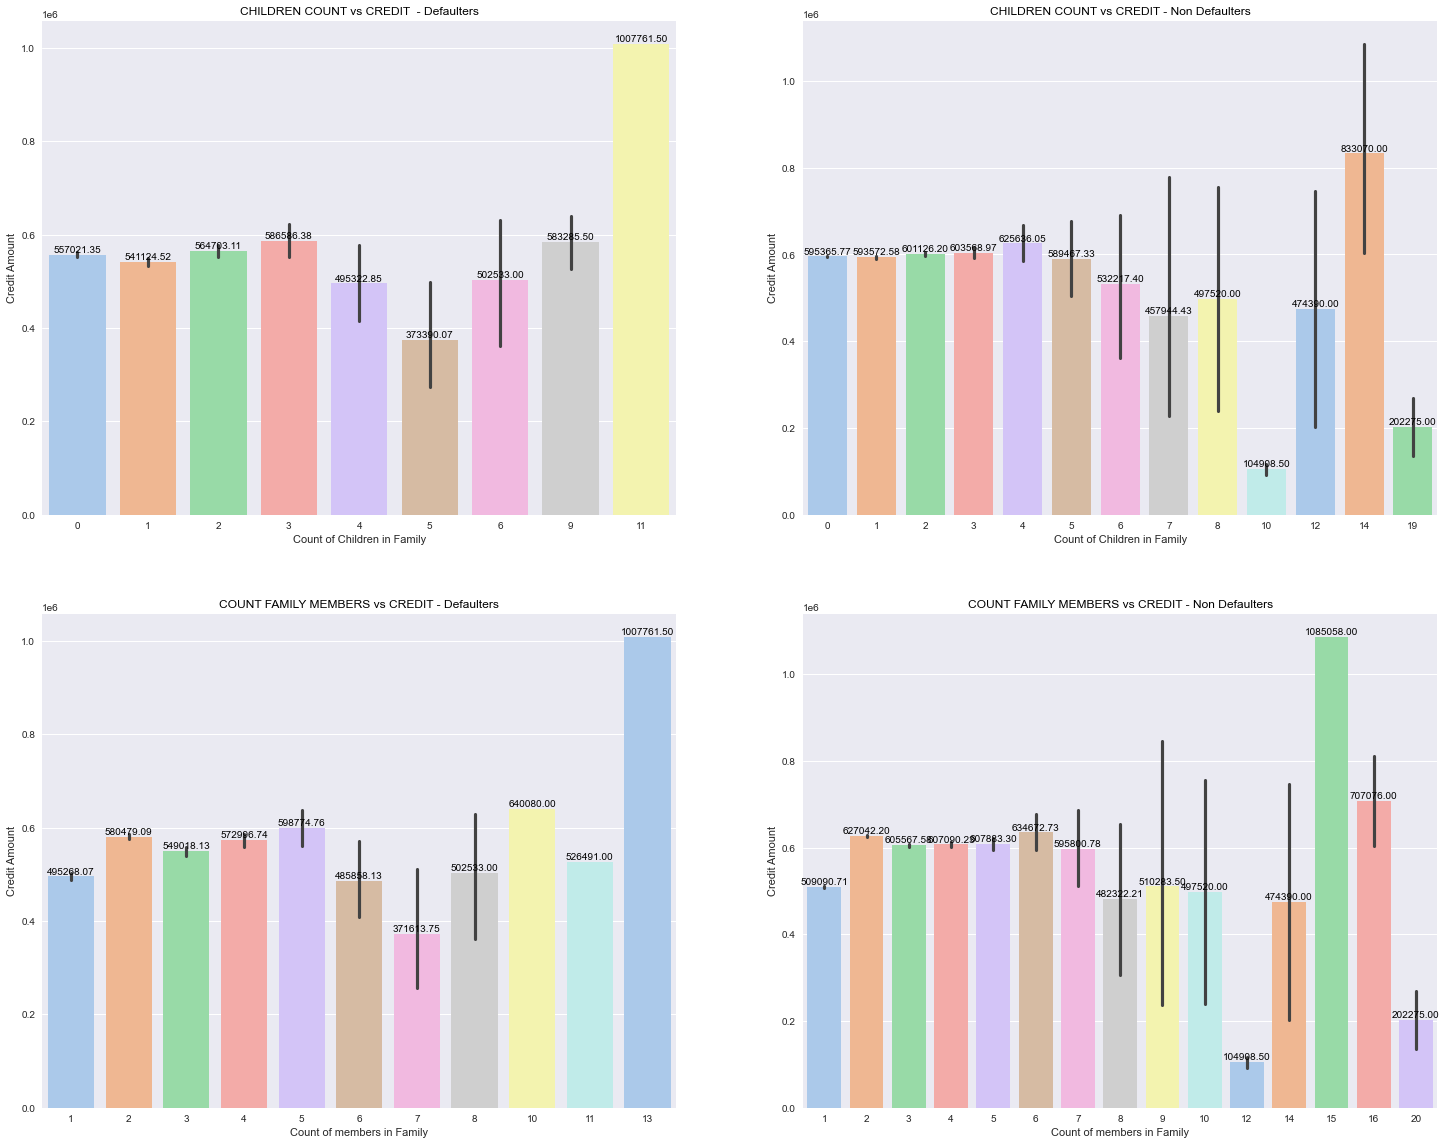

In [383]:
plt.style.use("seaborn")

fig, ax=plt.subplots(2,2,figsize=(25,20))

sns.barplot(x=inp01_d.CNT_CHILDREN,y=inp01_d.AMT_CREDIT,palette="pastel",ax=ax[0][0])
ax[0][0].set_title("CHILDREN COUNT vs CREDIT  - Defaulters", fontsize=12,color='black')
ax[0][0].set_xlabel("Count of Children in Family")
ax[0][0].set_ylabel("Credit Amount")

# To show data labels
for p in ax[0][0].patches:
             ax[0][0].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

sns.barplot(x=inp01_nd.CNT_CHILDREN,y=inp01_nd.AMT_CREDIT,palette="pastel",ax=ax[0][1])
ax[0][1].set_title("CHILDREN COUNT vs CREDIT - Non Defaulters", fontsize=12,color='black')
ax[0][1].set_xlabel("Count of Children in Family")
ax[0][1].set_ylabel("Credit Amount")


# To show data labels
for p in ax[0][1].patches:
             ax[0][1].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
                
                
sns.barplot(x=inp01_d.CNT_FAM_MEMBERS,y=inp01_d.AMT_CREDIT,palette="pastel",ax=ax[1][0])
ax[1][0].set_title("COUNT FAMILY MEMBERS vs CREDIT - Defaulters", fontsize=12,color='black')
ax[1][0].set_xlabel("Count of members in Family")
ax[1][0].set_ylabel("Credit Amount")


# To show data labels
for p in ax[1][0].patches:
             ax[1][0].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

sns.barplot(x=inp01_nd.CNT_FAM_MEMBERS,y=inp01_nd.AMT_CREDIT,palette="pastel",ax=ax[1][1])
ax[1][1].set_title("COUNT FAMILY MEMBERS vs CREDIT - Non Defaulters", fontsize=12,color='black')
ax[1][1].set_xlabel("Count of members in Family")
ax[1][1].set_ylabel("Credit Amount")


# To show data labels
for p in ax[1][1].patches:
             ax[1][1].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')                



    
plt.show()

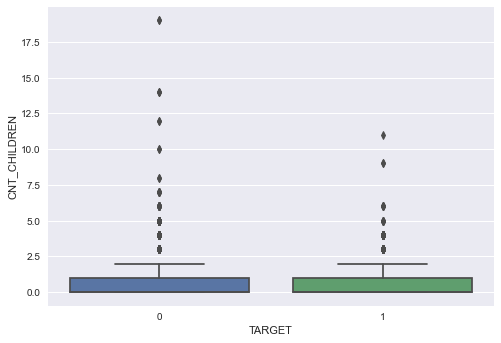

In [384]:
#plot the boxplot of age with response_flag
sns.boxplot(data=inp01,x="TARGET",y="CNT_CHILDREN")
plt.show()

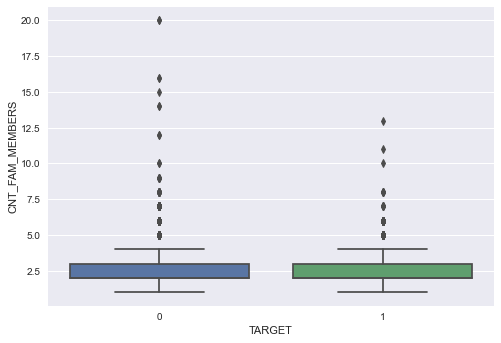

In [385]:
#plot the boxplot of age with response_flag
sns.boxplot(data=inp01,x="TARGET",y="CNT_FAM_MEMBERS")
plt.show()

#### Insight

-> Except for some excpetional cases(outliers) there is no inpact wrt Count of Childern and Count of Family members

In [388]:
#Creating a new varaiable CREDIT_GROUP for further analysis
inp01['CREDIT_GROUP']=pd.qcut(inp01['AMT_CREDIT'],
                                       q=[0,0.1,0.3,0.6,0.8,1],
                                       labels=['VeryLow','Low','Medium','High','VeryHigh'])

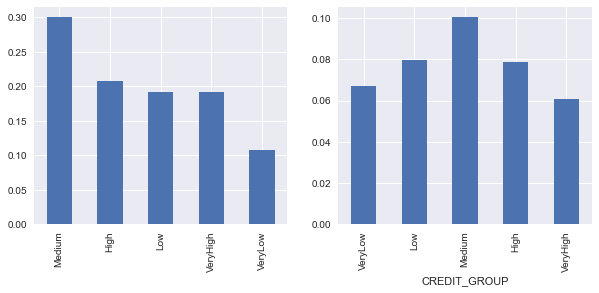

In [389]:
#plot the percentage of each buckets and average values of TARGET in each buckets. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
inp01.CREDIT_GROUP.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
inp01.groupby("CREDIT_GROUP")["TARGET"].mean().plot.bar()
plt.show()

#### Insight

Applicants who default more are the people whose Credit Amount is in medium range.

# Multi Variate analysis

In [390]:
inp01.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EXP,INCOME_GROUP,AGE_GROUP,YEARS_EXP_GROUP,CREDIT_INCOME_RATIO,CREDIT_GROUP
0,100002,1,Cash loans,Male,N,Y,0,"202,500.00","406,597.50","24,700.50","351,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,9461,637.00,"3,648.00",2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.00,0.00,2.00,0.00,"1,134.00",0.00,0.00,0.00,0.00,0.00,1.00,25,1,High,"(20, 25]","(0.0, 5.0]",2.00,Medium
1,100003,0,Cash loans,Female,N,N,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",Family,State servant,Higher education,Married,House / apartment,0.00,16765,"1,188.00","1,186.00",291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1.00,0.00,1.00,0.00,828.00,0.00,0.00,0.00,0.00,0.00,0.00,45,3,VeryHigh,"(40, 45]","(0.0, 5.0]",5.00,VeryHigh
2,100004,0,Revolving loans,Male,Y,Y,0,"67,500.00","135,000.00","6,750.00","135,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,19046,225.00,"4,260.00",2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.00,0.00,0.00,0.00,815.00,0.00,0.00,0.00,0.00,0.00,0.00,52,0,VeryLow,"(50, 55]",NaN,2.00,VeryLow
3,100006,0,Cash loans,Female,N,Y,0,"135,000.00","312,682.50","29,686.50","297,000.00",Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,19005,"3,039.00","9,833.00",2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.00,0.00,2.00,0.00,617.00,0.00,0.00,0.00,0.00,0.00,1.00,52,8,Medium,"(50, 55]","(5.0, 10.0]",2.00,Medium
4,100007,0,Cash loans,Male,N,Y,0,"121,500.00","513,000.00","21,865.50","513,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,19932,"3,038.00","4,311.00",3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.00,0.00,0.00,0.00,"1,106.00",0.00,0.00,0.00,0.00,0.00,0.00,54,8,Medium,"(50, 55]","(5.0, 10.0]",4.00,Medium


#### Education vs Family Status Vs Target

In [392]:
#create heat map of education vs marital vs target
result=pd.pivot_table(data=inp01, index="NAME_EDUCATION_TYPE",columns="NAME_FAMILY_STATUS",values="TARGET")

In [393]:
inp01.TARGET.describe()

count   307,511.00
mean          0.08
std           0.27
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           1.00
Name: TARGET, dtype: float64

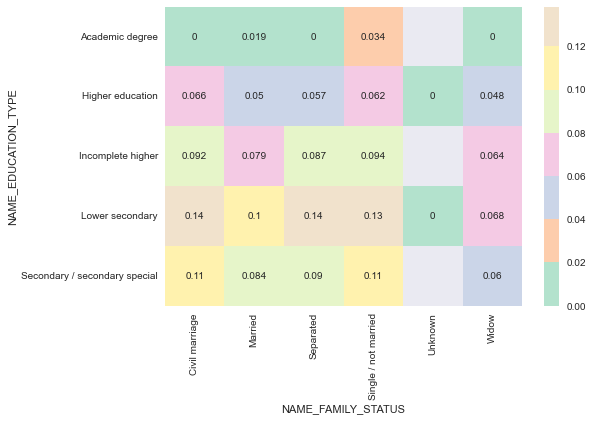

In [394]:
sns.heatmap(result, annot=True, cmap="Pastel2", center=0.08)
plt.show()

#### Insight
Applicants Lower secondary and Secondary education background belonging to Civil Marriage ,Single and Separated Family status are more among defaulters


### Highest Credit Loss due to defaulters

In [407]:
#create heat map of Income group vs Income type vs Credit
pivot1=pd.pivot_table(data=inp01_d, index="INCOME_GROUP",columns="NAME_INCOME_TYPE",values="AMT_CREDIT")

In [397]:
inp01_d.AMT_CREDIT.describe()

count      24,825.00
mean      554,495.75
std       333,588.16
min        45,000.00
25%       284,400.00
50%       497,520.00
75%       733,315.50
max     1,616,625.00
Name: AMT_CREDIT, dtype: float64

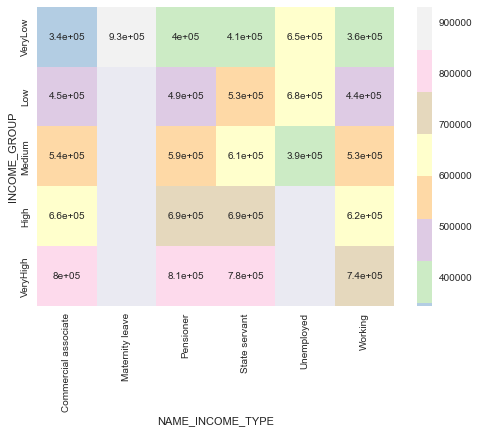

In [408]:
sns.heatmap(pivot1, annot=True, cmap="Pastel1", center=554495.75)
plt.show()

# Working with Prev Application dataset

In [409]:
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,"1,730.43","17,145.00","17,145.00",0.00,"17,145.00",SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,"365,243.00",-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,"25,188.62","607,500.00","679,671.00",NaN,"607,500.00",THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,"365,243.00",-134.00,916.00,"365,243.00","365,243.00",1.00
2,2523466,122040,Cash loans,"15,060.74","112,500.00","136,444.50",NaN,"112,500.00",TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,"365,243.00",-271.00,59.00,"365,243.00","365,243.00",1.00
3,2819243,176158,Cash loans,"47,041.33","450,000.00","470,790.00",NaN,"450,000.00",MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,"365,243.00",-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,"31,924.40","337,500.00","404,055.00",NaN,"337,500.00",THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### Identifying nulls

In [413]:
mv=inp1.isnull().mean()

In [414]:
mv=mv.reset_index()
mv=mv.rename(columns={"index":"Column Name",0: "% of Nulls"})
mv["% of Nulls"]=mv["% of Nulls"]*100
mv=mv.sort_values(by="% of Nulls",ascending=False)

In [415]:
mv

,Column Name,% of Nulls
14,RATE_INTEREST_PRIVILEGED,99.64
13,RATE_INTEREST_PRIMARY,99.64
6,AMT_DOWN_PAYMENT,53.64
12,RATE_DOWN_PAYMENT,53.64
20,NAME_TYPE_SUITE,49.12
36,NFLAG_INSURED_ON_APPROVAL,40.30
35,DAYS_TERMINATION,40.30
34,DAYS_LAST_DUE,40.30
33,DAYS_LAST_DUE_1ST_VERSION,40.30
32,DAYS_FIRST_DUE,40.30


In [416]:
# Identifying columns that have more than 40% null values
drop_cols=mv[mv["% of Nulls"]>40]["Column Name"]

In [417]:
drop_cols

14     RATE_INTEREST_PRIVILEGED
13        RATE_INTEREST_PRIMARY
6              AMT_DOWN_PAYMENT
12            RATE_DOWN_PAYMENT
20              NAME_TYPE_SUITE
36    NFLAG_INSURED_ON_APPROVAL
35             DAYS_TERMINATION
34                DAYS_LAST_DUE
33    DAYS_LAST_DUE_1ST_VERSION
32               DAYS_FIRST_DUE
31           DAYS_FIRST_DRAWING
Name: Column Name, dtype: object

In [419]:
# dropping the null columns from the dataset

inp11=inp1.drop(drop_cols,axis=1)

In [420]:
inp11.shape

(1670214, 26)

#### Target variable is NAME_CONTRACT_STATUS

#### Univariate Analysis on the Target Variable

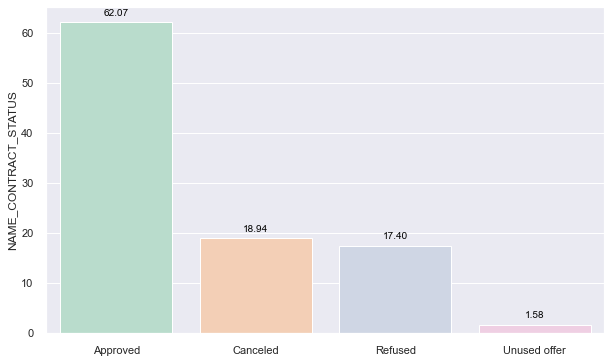

In [519]:
plt.figure(figsize=(10,6))



ax=sns.barplot(x=inp1.NAME_CONTRACT_STATUS.value_counts().index,y=inp1.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100,palette="Pastel2")

for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.show()

#### Insight

Approved loans 62.07%

Cancelled loans 18.94%

Refused loans 17.40%

Unused Offer 1.58%


## Merging the Previous application dataset with Application dataset


In [421]:
## Merging the two files to do some analysis
inp = pd.merge(inp01, inp11, how='left', on=['SK_ID_CURR'])

In [422]:
inp.shape

(1430155, 83)

In [524]:
inp.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EXP,INCOME_GROUP,AGE_GROUP,YEARS_EXP_GROUP,CREDIT_INCOME_RATIO,CREDIT_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,Male,N,Y,0,"202,500.00","406,597.50","24,700.50","351,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,9461,637.00,"3,648.00",2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.00,0.00,2.00,0.00,"1,134.00",0.00,0.00,0.00,0.00,0.00,1.00,25,1,High,"(20, 25]","(0.0, 5.0]",2.00,Medium,"1,038,818.00",Consumer loans,"9,251.77","179,055.00","179,055.00","179,055.00",SATURDAY,9.00,Y,1.00,XAP,Approved,-606.00,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.00,Auto technology,24.00,low_normal,POS other with interest
1,100003,0,Cash loans,Female,N,N,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",Family,State servant,Higher education,Married,House / apartment,0.00,16765,"1,188.00","1,186.00",291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1.00,0.00,1.00,0.00,828.00,0.00,0.00,0.00,0.00,0.00,0.00,45,3,VeryHigh,"(40, 45]","(0.0, 5.0]",5.00,VeryHigh,"1,810,518.00",Cash loans,"98,356.99","900,000.00","1,035,882.00","900,000.00",FRIDAY,12.00,Y,1.00,XNA,Approved,-746.00,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.00,XNA,12.00,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,Female,N,N,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",Family,State servant,Higher education,Married,House / apartment,0.00,16765,"1,188.00","1,186.00",291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1.00,0.00,1.00,0.00,828.00,0.00,0.00,0.00,0.00,0.00,0.00,45,3,VeryHigh,"(40, 45]","(0.0, 5.0]",5.00,VeryHigh,"2,636,178.00",Consumer loans,"64,567.67","337,500.00","348,637.50","337,500.00",SUNDAY,17.00,Y,1.00,XAP,Approved,-828.00,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,"1,400.00",Furniture,6.00,middle,POS industry with interest
3,100003,0,Cash loans,Female,N,N,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",Family,State servant,Higher education,Married,House / apartment,0.00,16765,"1,188.00","1,186.00",291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1.00,0.00,1.00,0.00,828.00,0.00,0.00,0.00,0.00,0.00,0.00,45,3,VeryHigh,"(40, 45]","(0.0, 5.0]",5.00,VeryHigh,"2,396,755.00",Consumer loans,"6,737.31","68,809.50","68,053.50","68,809.50",SATURDAY,15.00,Y,1.00,XAP,Approved,"-2,341.00",Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.00,Consumer electronics,12.00,middle,POS household with interest
4,100004,0,Revolving loans,Mal

##### Let us check the effect of Previous Application Status on TARGET variable of new applications

In [479]:
Pivot=pd.pivot_table(data=inp, index="TARGET",columns="NAME_CONTRACT_STATUS",values="SK_ID_CURR",aggfunc='count')

In [480]:
Pivot=Pivot.div(Pivot.sum(axis=1),axis='rows')*100

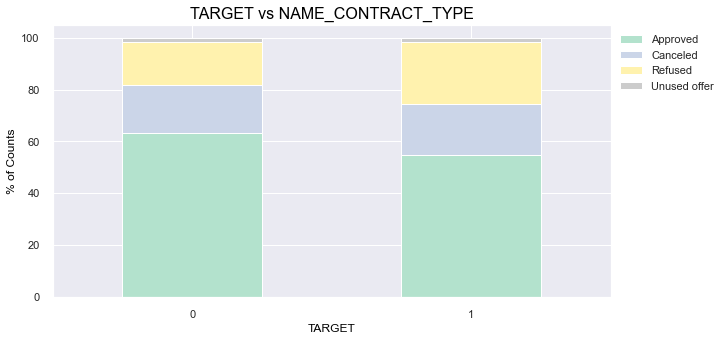

In [523]:
Pivot.plot(kind='bar',stacked=True,figsize=(10,5),colormap="Pastel2")
plt.xticks(rotation=0)
plt.title("TARGET vs NAME_CONTRACT_TYPE", fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'black'})
plt.xlabel("TARGET", fontdict={'fontsize': 12, 'fontweight' : 10, 'color' : 'black'})
plt.ylabel("% of Counts", fontdict={'fontsize': 12, 'fontweight' : 10, 'color' : 'black'} )

plt.legend(bbox_to_anchor=(1,1))

plt.show()

#### Insights

1. Defaulters are less when their previous application got Approved.

2. In contradiction of above applicants whose previous application was Refused defaulted more.

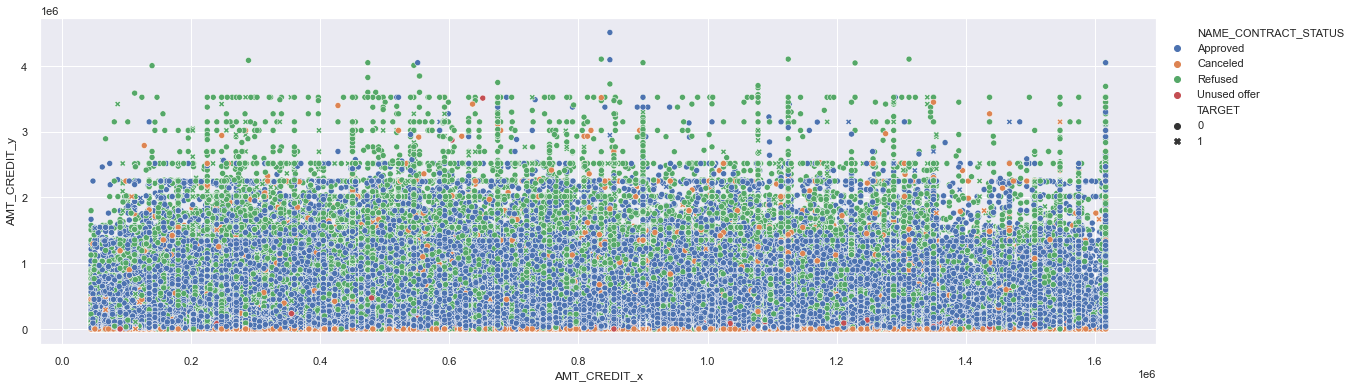

In [531]:
plt.figure(figsize=(20,6))

sns.scatterplot(data=inp, x="AMT_CREDIT_x", y="AMT_CREDIT_y", hue="NAME_CONTRACT_STATUS", style="TARGET")
plt.legend(bbox_to_anchor=(1,1))

plt.show()

In [532]:
#create the heat map of Credit Group vs Contract Status vs Target.
Credit_Group=pd.pivot_table(data=inp, index="CREDIT_GROUP",columns="NAME_CONTRACT_STATUS",values="TARGET")

In [534]:
inp.TARGET.describe()

count   1,430,155.00
mean            0.09
std             0.28
min             0.00
25%             0.00
50%             0.00
75%             0.00
max             1.00
Name: TARGET, dtype: float64

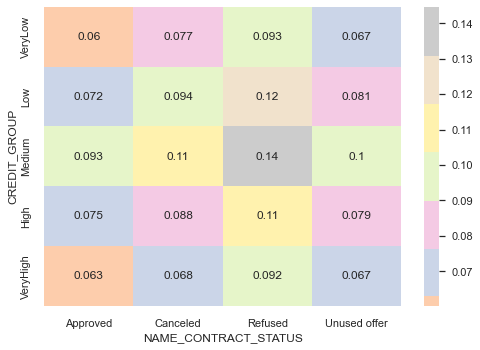

In [535]:
sns.heatmap(Credit_Group, annot=True, cmap="Pastel2",center=0.09)
plt.show()

#### Insight
Applicants who were refused loan previously and belong to medium credit range default more


In [536]:
#create the heat map of Income Group vs Contract Status vs Target.
Income_Group=pd.pivot_table(data=inp, index="INCOME_GROUP",columns="NAME_CONTRACT_STATUS",values="TARGET")

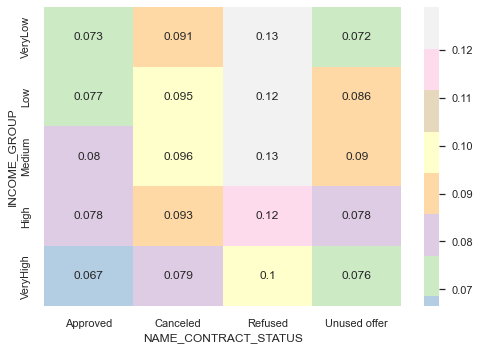

In [537]:
sns.heatmap(Income_Group, annot=True, cmap="Pastel1",center=0.09)
plt.show()

# Take aways from the analysis

##### Applicants opted for cash loans than revolving loans.
##### Highest number of applicants belonged to Female Gender, Family status married, Education Secondary and Higher, Working professionals with Income range between low to Medium
##### The Credit of loan increased with the price of goods for which loan is given
##### Below are found to be high risk categories wrt defaulters
      
Gender: Male

Age Groups: 20 – 40

Education : Lower Secondary and Secondary

Income Groups: Very low ,Low and Medium 

Income Type: Working

Family Status: Single, Civil Marriage

Occupation Type: Laborer, Sales Staff and Drivers

Region Rating Client : 3

##### Below categories are causing high loss of credit due to default as the average credit is very high.It is suggested to avoid high Credit Amount for these.
      
Age Group: >60
      
Work Exp:>30 years
      
Education : Higher Education
      
Income Type: Pensioner
      
Family Status: Widow, Civil Marriage

#### The applicants whose Previous  application status was Reject, are becoming highest defaulters.